## EDA
*Tim Braams (8460701), Vinh Phan (8462380), Maximilian Pintilie (8462780), Rahul Singh (8464147), Kartik Vijay (8463465), Diego Zucchino (8345420)*   
  

In [1]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_json("../02_Pool_Data/pooled_train_300.json")
df['index'] = pd.to_datetime(df['index'])
#Adding a year column to better categorize and group the data
df["year"] = df["index"].dt.year
df = df.sort_values('index')

#### Initial analysis
We omit the largest value(return around 180%) in the EDA from plots as showing it would make our time series seem constant.  

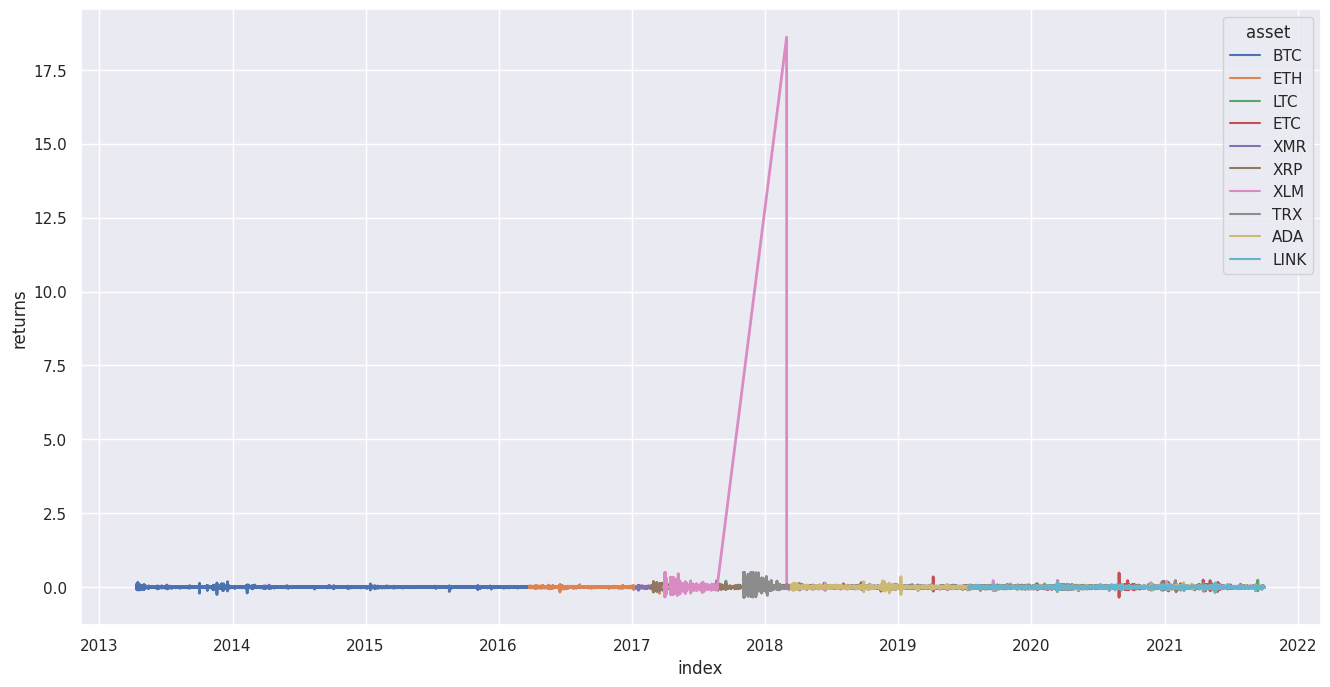

In [3]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(16, 8)})

ax = sns.lineplot(data=df, x='index', y='returns',
                  hue='asset', legend='full', lw=2)

plt.xlabel('index')
plt.show()

In [3]:
#Removing a single row from the analysis dataset due to its extremely high return skewing all plots
df = df.loc[df["returns"]<=17]

In [4]:
df.head()

,index,returns,t1,t2,t3,t4,t5,t6,t7,t8,...,t293,t294,t295,t296,t297,t298,t299,t300,asset,year
330952,2013-04-13 15:00:00,-0.062575,-0.070762,-0.004843,-0.002811,0.011190,-0.012481,-0.010106,-0.007181,0.011472,...,0.012703,0.024930,0.002955,0.007135,0.007136,-0.007757,0.006032,0.006156,BTC,2013
330953,2013-04-13 16:00:00,-0.030040,-0.062575,-0.070762,-0.004843,-0.002811,0.011190,-0.012481,-0.010106,-0.007181,...,0.051618,0.012703,0.024930,0.002955,0.007135,0.007136,-0.007757,0.006032,BTC,2013
330954,2013-04-13 17:00:00,-0.040244,-0.030040,-0.062575,-0.070762,-0.004843,-0.002811,0.011190,-0.012481,-0.010106,...,-0.036224,0.051618,0.012703,0.024930,0.002955,0.007135,0.007136,-0.007757,BTC,2013
330955,2013-04-13 18:00:00,0.093116,-0.040244,-0.030040,-0.062575,-0.070762,-0.004843,-0.002811,0.011190,-0.012481,...,0.034814,-0.036224,0.051618,0.012703,0.024930,0.002955,0.007135,0.007136,BTC,2013
330956,2013-04-13 19:00:00,-0.019265,0.093116,-0.040244,-0.030040,-0.062575,-0.070762,-0.004843,-0.002811,0.011190,...,-0.007842,0.034814,-0.036224,0.051618,0.012703,0.024930,0.002955,0.007135,BTC,2013


In [5]:
# Checking Start and End date for each crypto and number of entries
df.groupby(['asset']).agg(['first']).stack()['year']

asset       
ADA    first    2018
BTC    first    2013
ETC    first    2017
ETH    first    2016
LINK   first    2019
LTC    first    2017
TRX    first    2017
XLM    first    2017
XMR    first    2017
XRP    first    2017
Name: year, dtype: int64

In [6]:
# We create a separate dataset where returns are only zero to get a better idea of the data
df1 = df[df['returns'] == 0]
df1.groupby(['year']).describe()

returns                                         t1            ...  \
       count mean  std  min  25%  50%  75%  max   count      mean  ...   
year                                                               ...   
2013     2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     2.0 -0.000284  ...   
2016     9.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     9.0 -0.002580  ...   
2017  2512.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2512.0  0.001657  ...   
2018  2513.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2513.0 -0.000134  ...   
2019  7594.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  7594.0  0.000142  ...   
2020  8177.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  8177.0  0.000103  ...   
2021   723.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   723.0  0.000657  ...   

          t299              t300                                          \
           75%       max   count      mean       std       min       25%   
year                                                                       
2013 -0.001399 -0.000959     2.0 -0.003362  0.004498 -0.006542 -0.004952   
2016  0.001101  0.013279     9.0  0.001512  0.003957 -0.002219 -0.000176   
2017  0.000000  0.991922  2512.0  0.004783  0.097593 -0.497972  0.000000   
2018  0.000972  0.082657  2513.0 -0.000143  0.015169 -0.088789 -0.001734   
2019  0.000235  0.096383  7594.0  0.000058  0.012613 -0.108148 -0.000300   
2020  0.000000  0.141553  8177.0  0.000263  0.014294 -0.120041  0.000000   
2021  0.002825  0.058531   723.0  0.000285  0.012101 -0.066847 -0.003062   

                                    
           50%       75%       max  
year                                
2013 -0.003362 -0.001771 -0.000181  
2016  0.000065  0.001531  0.010958  
2017  0.000000  0.000000  1.851852  
2018  0.000000  0.001053  0.112898  
2019  0.000000  0.000261  0.096383  
2020  0.000000  0.000000  0.166340  
2021  0.000000  0.004148  0.056939  

[7 rows x 2408 columns]

In [7]:
# So we can see the cryptos responsible for the 0 returns
# TRX or Tron alone is responsible for ~70% of the 0.0 return trades
df1.groupby(['asset']).agg(['count']).stack()['returns']

asset       
ADA    count     3932
BTC    count        2
ETC    count        7
ETH    count        9
TRX    count    13618
XLM    count     3084
XMR    count        3
XRP    count      875
Name: returns, dtype: int64

In [8]:
# Here we can see the % of trades every year that yield zero returns
(df1.groupby(['year']).describe() / df.groupby(['year']).describe()) * 100

returns                                           t1               ...  \
         count mean  std  min  25%  50%  75%  max     count         mean  ...   
year                                                                      ...   
2013  0.032315  0.0  0.0 -0.0 -0.0  0.0  0.0  0.0  0.032315   -66.600500  ...   
2014       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN       NaN          NaN  ...   
2015       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN       NaN          NaN  ...   
2016  0.059896  0.0  0.0 -0.0 -0.0  0.0  0.0  0.0  0.059896 -3859.782737  ...   
2017  4.595935  0.0  0.0 -0.0 -0.0  NaN  0.0  0.0  4.595935   205.916433  ...   
2018  3.343311 -0.0  0.0 -0.0 -0.0  NaN  0.0  0.0  3.343311   -82.963077  ...   
2019  9.154692  0.0  0.0 -0.0 -0.0  NaN  0.0  0.0  9.154692   567.119205  ...   
2020  9.308971  0.0  0.0 -0.0 -0.0  NaN  0.0  0.0  9.308971    53.342732  ...   
2021  1.103648  0.0  0.0 -0.0 -0.0  0.0  0.0  0.0  1.103648   241.069172  ...   

           t299                 t300                                      \
            75%        max     count         mean         std        min   
year                                                                       
2013 -27.375962  -0.515685  0.032315  -686.784759   24.536811   2.621680   
2014        NaN        NaN       NaN          NaN         NaN        NaN   
2015        NaN        NaN       NaN          NaN         NaN        NaN   
2016  50.826071  14.630121  0.059896  3762.513056   49.571980   1.333916   
2017   0.000000  53.563766  4.595935   446.359988  200.947841  71.138886   
2018  18.479990   0.444393  3.343311   -88.857280   21.814402  31.827538   
2019   7.036128  27.302725  9.154692   205.837270  125.309410  42.416261   
2020   0.000000  29.495671  9.308971   127.570903  127.320668  35.143780   
2021  44.982508  24.249971  1.103648   101.655128   83.570794  37.986077   

                                                    
             25%         50%        75%        max  
year                                                
2013  125.048456 -670.248116 -34.655588  -0.097324  
2014         NaN         NaN        NaN        NaN  
2015         NaN         NaN        NaN        NaN  
2016    8.126642  228.529972  70.647780  12.073119  
2017   -0.000000         NaN   0.000000  20.576131  
2018   31.400936         NaN  20.004104   0.606979  
2019    8.792498         NaN   7.820225  27.302725  
2020   -0.000000         NaN   0.000000  34.660521  
2021   53.557660    0.000000  66.010293  23.590660  

[9 rows x 2408 columns]

We can see that ~5.5% of the dataset has rows where returns = 0. 65% of which are from TRX coin, these account for ~4% of the whole dataset. Now it wouldn't matter so much were there unique models for each coin, but working with a pooled dataset, this presents a problem, a biased coin that could potentially skew return predictions towards 0.

To elaborate, the overall mean of our returns is 0.000194, already a low number not too far from 0. Furthermore, we have a window of three hundred in our dataset, therefore, a single row with 0 returns would permeate throughout the whole window. Considering the low initial values, such a heavy skew would inadvertently push rolled data further towards 0, in a scenario where values are already apart only by a factor of 1/100ths or less. Additionally, considering again that 65% of this bias is coming from a single coin, this could be an unacceptably large bias factor. 

In [9]:
#There are no NAN values in the dataset
df.isna().sum().sort_values()

index    0
t205     0
t204     0
t203     0
t202     0
        ..
t97      0
t96      0
t95      0
t102     0
year     0
Length: 304, dtype: int64

In [10]:
df.describe()

,returns,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t292,t293,t294,t295,t296,t297,t298,t299,t300,year
count,404849.000000,404849.000000,404849.000000,404849.000000,404849.000000,404849.000000,404849.000000,404849.000000,404849.000000,404849.000000,...,404849.000000,404849.000000,404849.000000,404849.000000,404849.000000,404849.000000,404849.000000,404849.000000,404849.000000,404849.000000
mean,0.000194,0.000239,0.000240,0.000240,0.000240,0.000239,0.000240,0.000240,0.000239,0.000239,...,0.000255,0.000255,0.000255,0.000260,0.000259,0.000260,0.000259,0.000258,0.000280,2018.687224
std,0.014385,0.032584,0.032594,0.032594,0.032594,0.032598,0.032608,0.032612,0.032613,0.032613,...,0.033143,0.033143,0.033144,0.033271,0.033273,0.033273,0.033273,0.033291,0.036171,1.806412
min,-0.341570,-0.341570,-0.341570,-0.341570,-0.341570,-0.341570,-0.341570,-0.341570,-0.341570,-0.341570,...,-0.497972,-0.497972,-0.497972,-0.497972,-0.497972,-0.497972,-0.497972,-0.700000,-0.700000,2013.000000
25%,-0.004104,-0.004105,-0.004105,-0.004104,-0.004104,-0.004105,-0.004105,-0.004105,-0.004105,-0.004105,...,-0.004101,-0.004102,-0.004101,-0.004101,-0.004101,-0.004101,-0.004102,-0.004101,-0.004101,2018.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.000000
75%,0.004328,0.004328,0.004328,0.004328,0.004328,0.004328,0.004328,0.004328,0.004328,0.004328,...,0.004330,0.004330,0.004331,0.004331,0.004331,0.004331,0.004331,0.004331,0.004332,2020.000000
max,0.500000,18.600005,18.600005,18.600005,18.600005,18.600005,18.600005,18.600005,18.600005,18.600005,...,18.600005,18.600005,18.600005,18.600005,18.600005,18.600005,18.600005,18.600005,18.600005,2021.000000


From the correlation matrix we can interestingly see that its not only the most recent timestamps that have a high correlation with the next return. 2 hours and 24 hours have high correlations but also 175, which cannot be explained intuativley. We will have to make sure our models capture these relationships.

In [13]:
correlation = df.corr()["returns"]

In [20]:
correlation.iloc[1:-1].sort_values()

t2     -0.035361
t25    -0.016548
t24    -0.013304
t236   -0.010141
t272   -0.009171
          ...   
t155    0.007898
t235    0.007985
t265    0.008148
t18     0.010162
t175    0.010375
Name: returns, Length: 300, dtype: float64

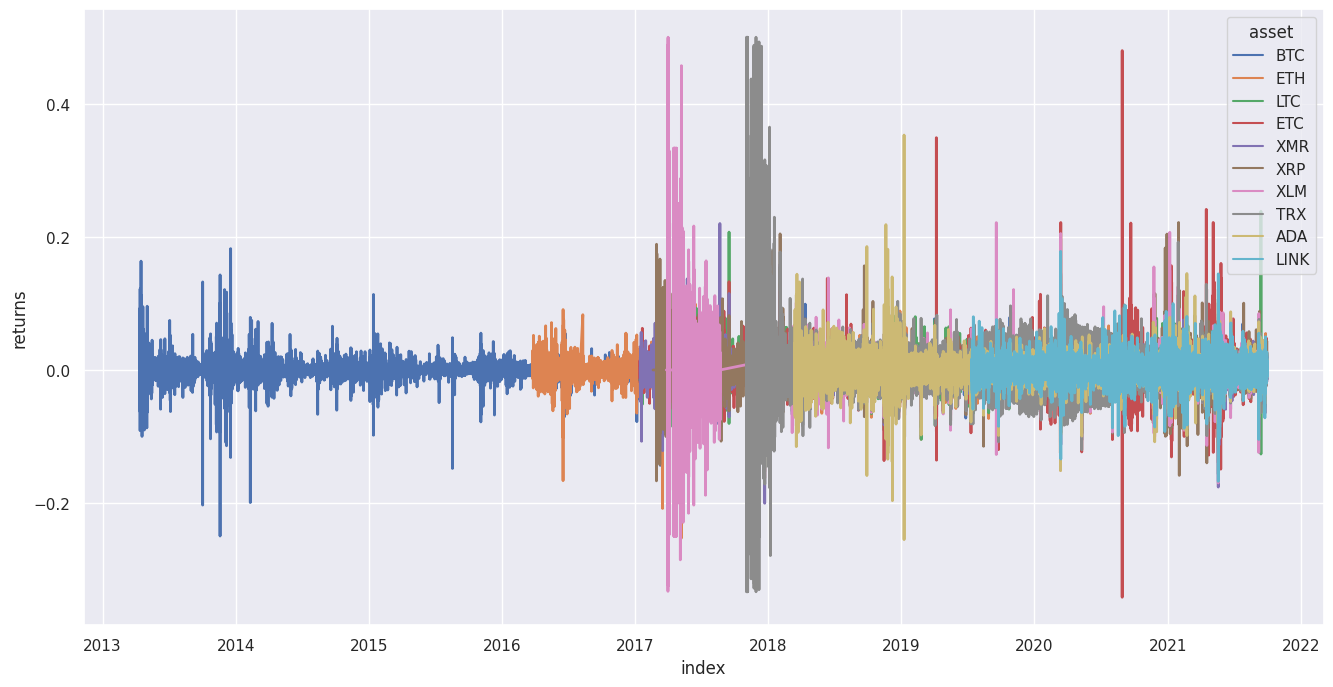

In [21]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(16,8)})

ax = sns.lineplot(data=df, x ='index', y = 'returns',
                  hue='asset',
                  legend='full', lw=2)

plt.xlabel('index')
plt.show()

#### Seasonal Decomposition

The graphs below show no obvious trends in the data that could help us model it.

We can see that most of our dataset hovers in the range of -0.2 to +0.2 returns, with most range-breaking values coming in 2017-2018, when new cryptocurrencies were introduced in the dataset.


In [14]:
df['returns']

330952   -0.062575
330953   -0.030040
330954   -0.040244
330955    0.093116
330956   -0.019265
            ...   
276815   -0.007793
311502    0.002285
330951    0.004692
195394    0.006377
404849    0.004479
Name: returns, Length: 404849, dtype: float64

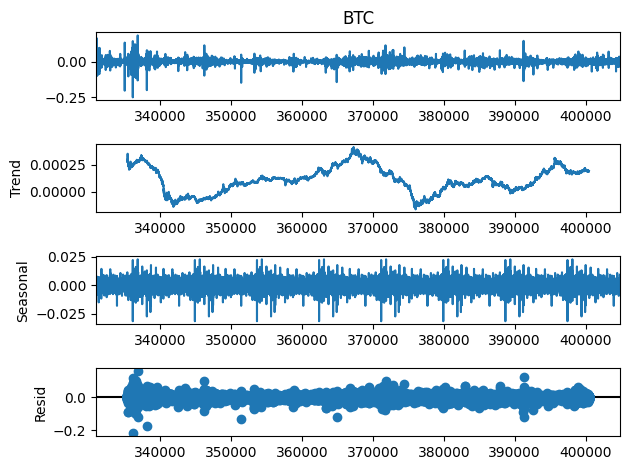

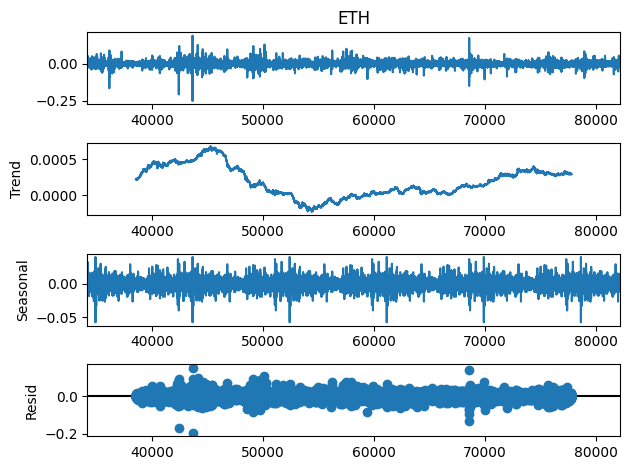

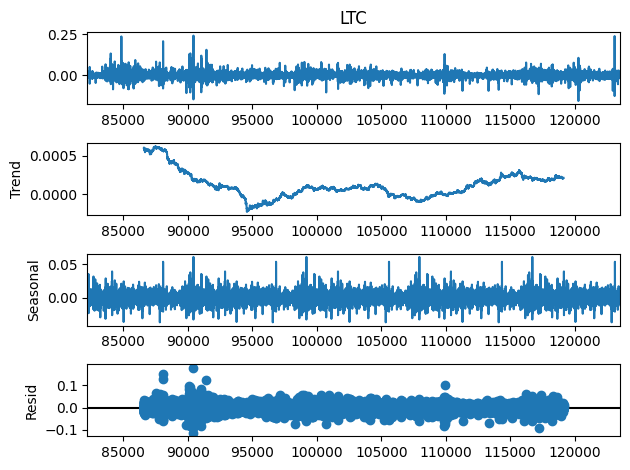

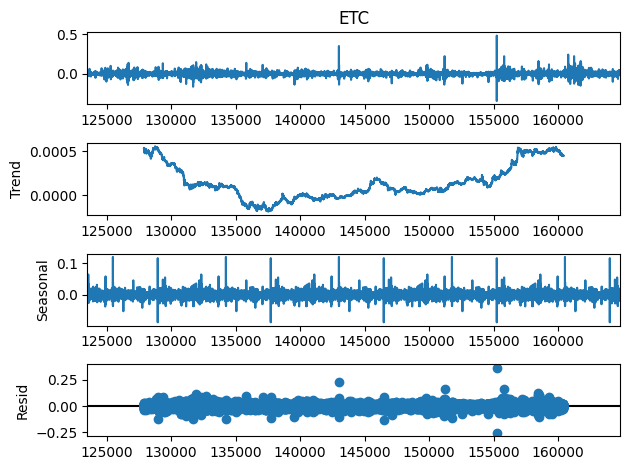

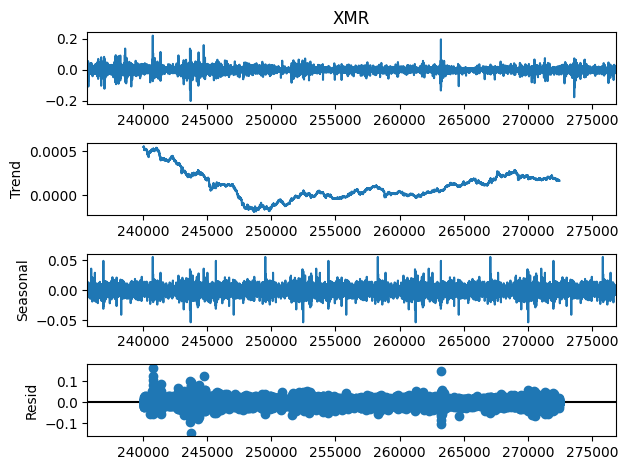

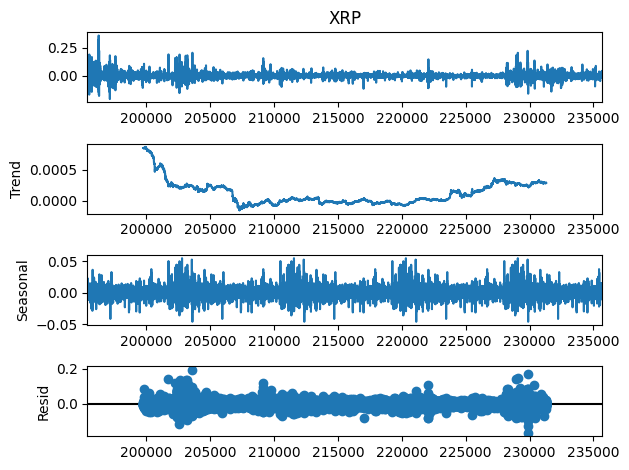

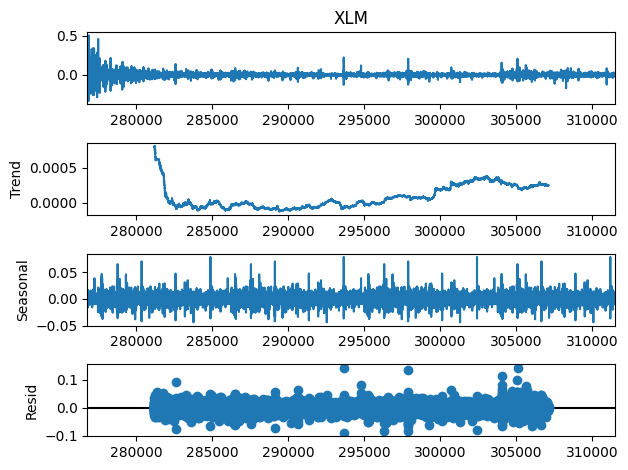

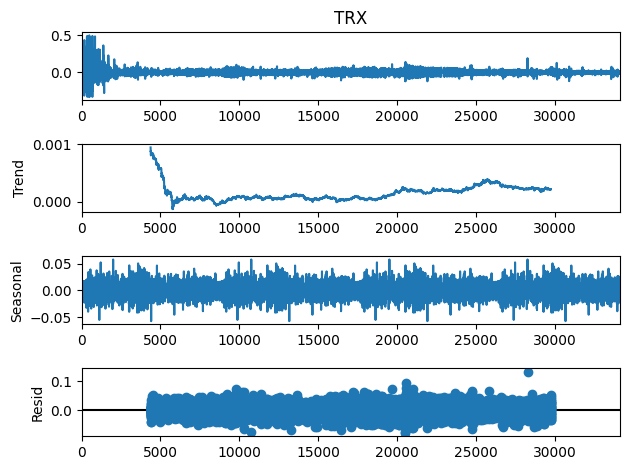

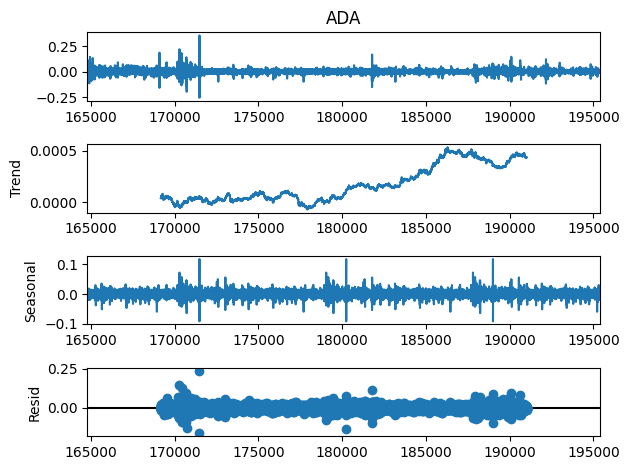

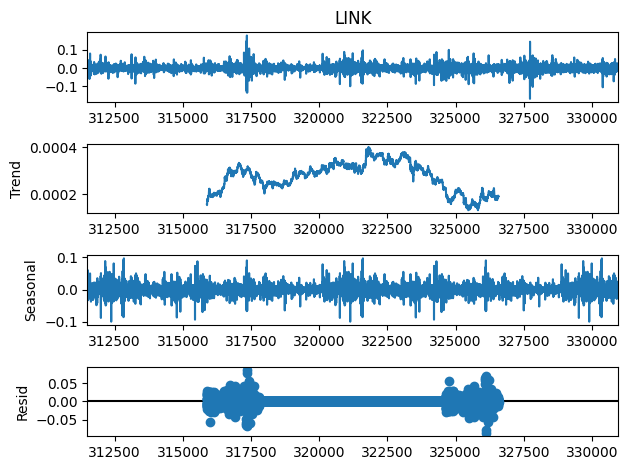

In [18]:
for asset in df["asset"].unique():
    temp_df = df[df["asset"] == asset]["returns"]
    temp_df.name = asset
    decomposition = seasonal_decompose(temp_df, model='additive', period=24*365)
    decomposition.title = asset
    decomposition.plot()

#### Autocorrelation Function

Based on our research, we can argue that autocorrelation and partial autocorrelation functions provide value not just for linear but also for Neural Network models  
Their findings show:
1. That acf and pacf functions can help reduce the number of inputs necessary for NN models. (1,pg. 9)
2. Statistically significant lags can be found even after a long period. (1,pg. 6)
3. The models in the paper with more significant lags produced smaller NMSET errors than the other three models. (1,pg. 8)



[1] Flores, João Henrique Ferreira & Engel, Paulo & Pinto, Rafael. (2012). Autocorrelation and partial autocorrelation functions to improve neural networks models on univariate time series forecasting. Proceedings of the International Joint Conference on Neural Networks. 1-8. 10.1109/IJCNN.2012.6252470.  https://www.researchgate.net/publication/261464969_Autocorrelation_and_partial_autocorrelation_functions_to_improve_neural_networks_models_on_univariate_time_series_forecasting

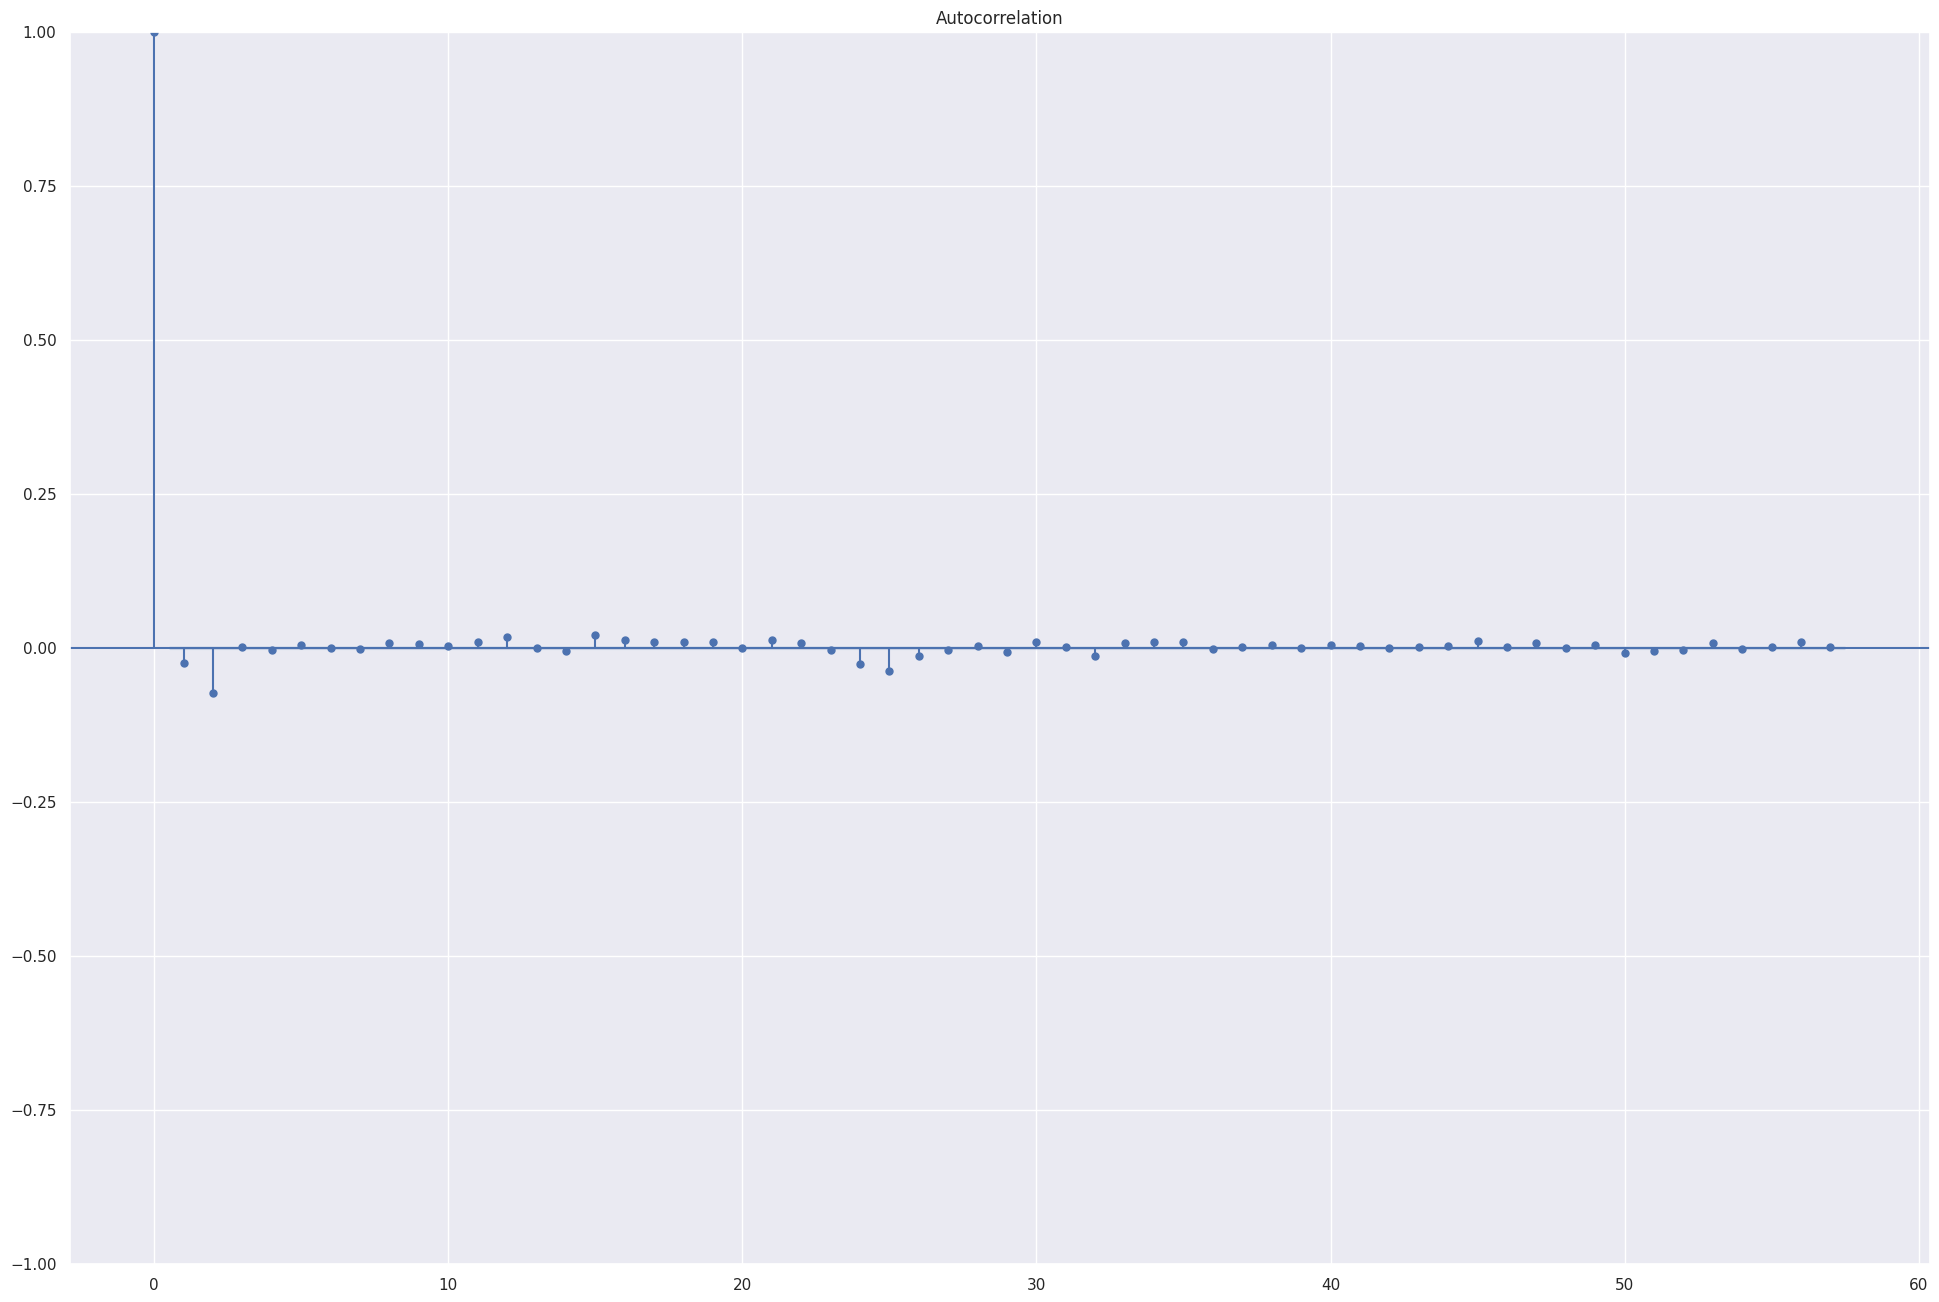

In [20]:
plt.rc("figure", figsize=(24,16))
sm.graphics.tsa.plot_acf(df['returns'], alpha=0.05);

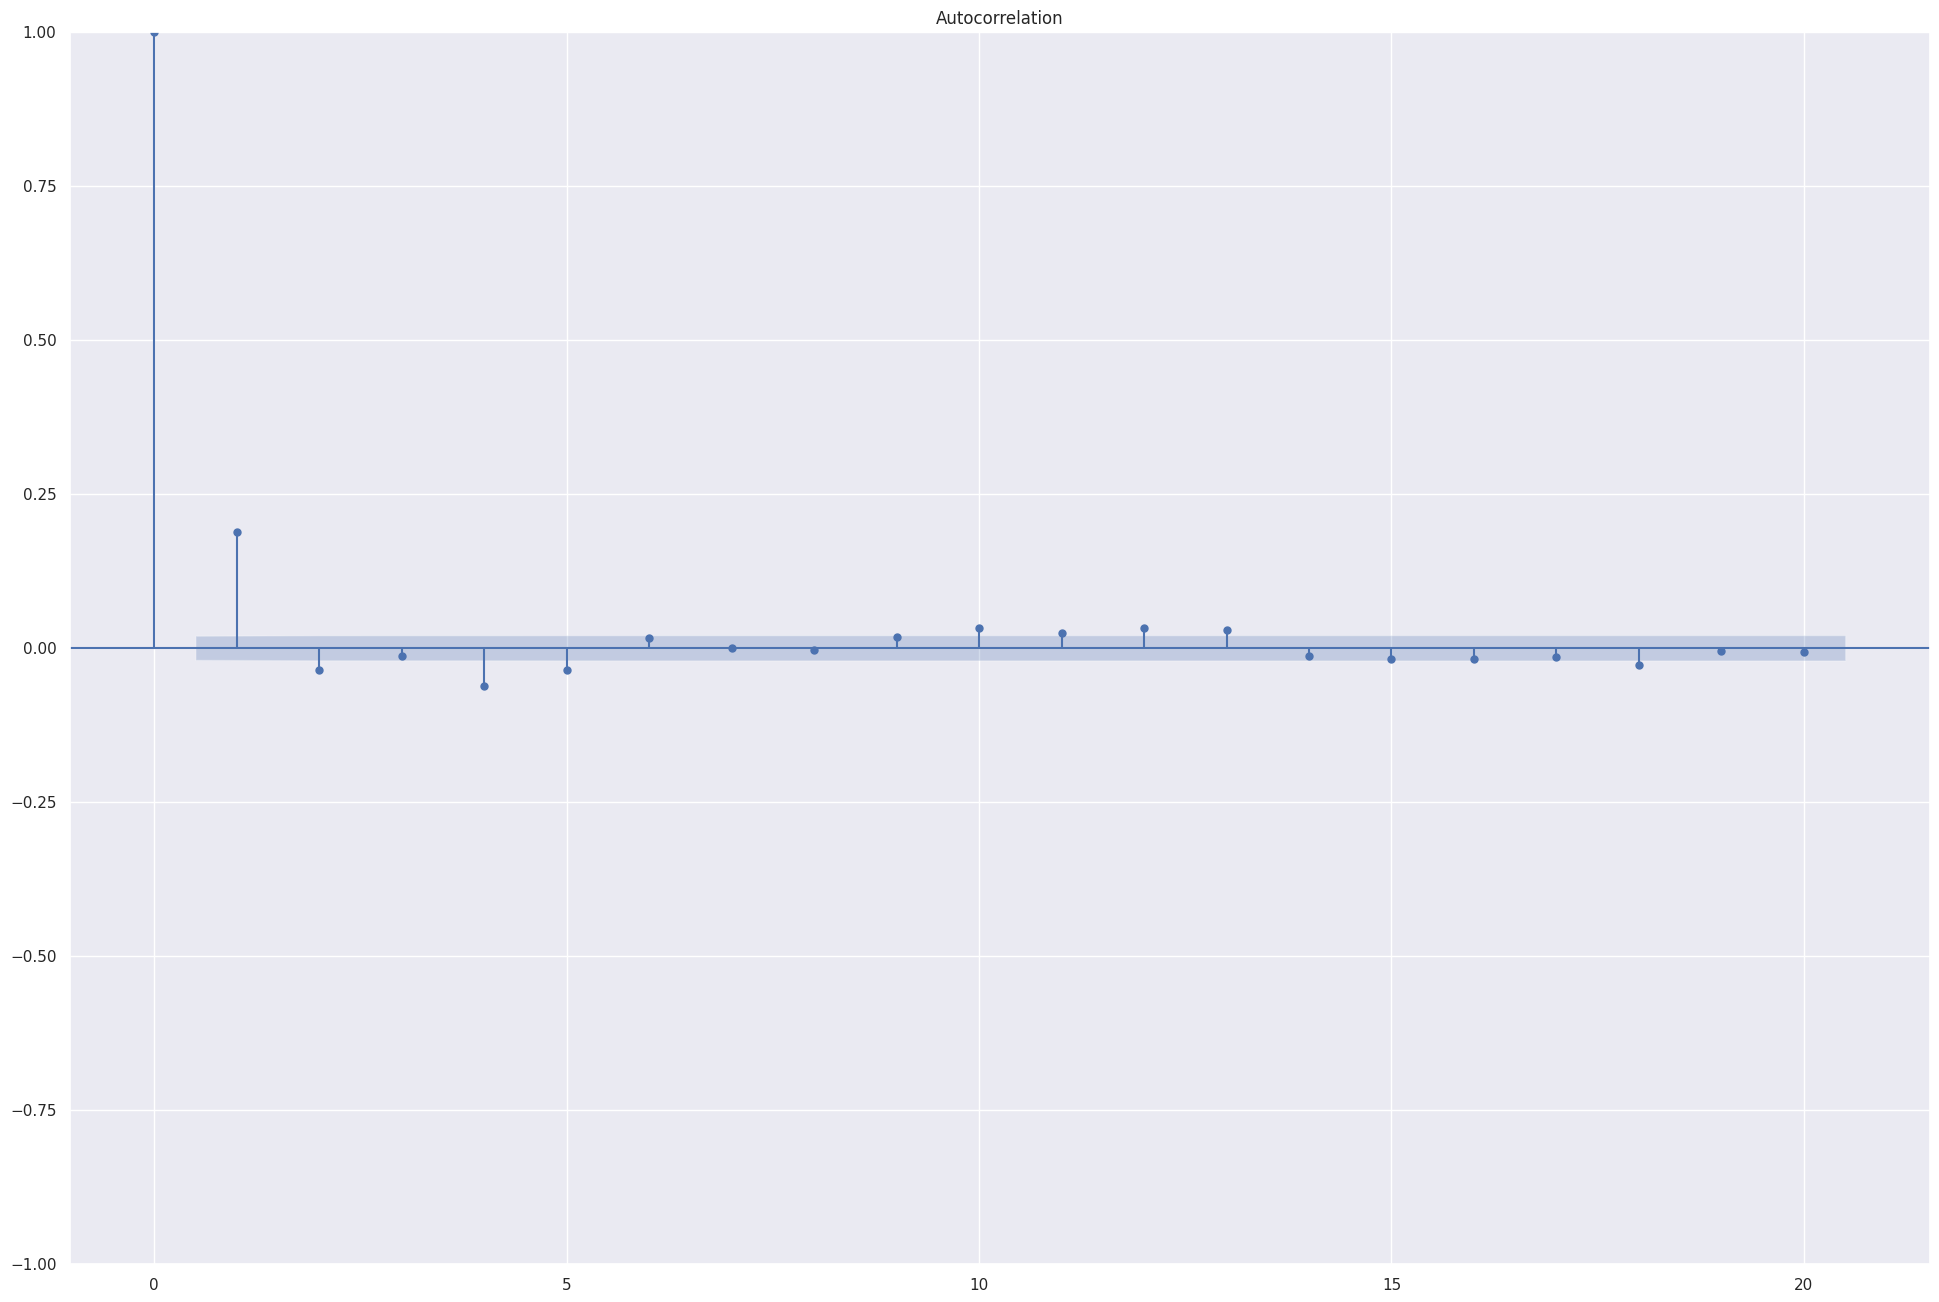

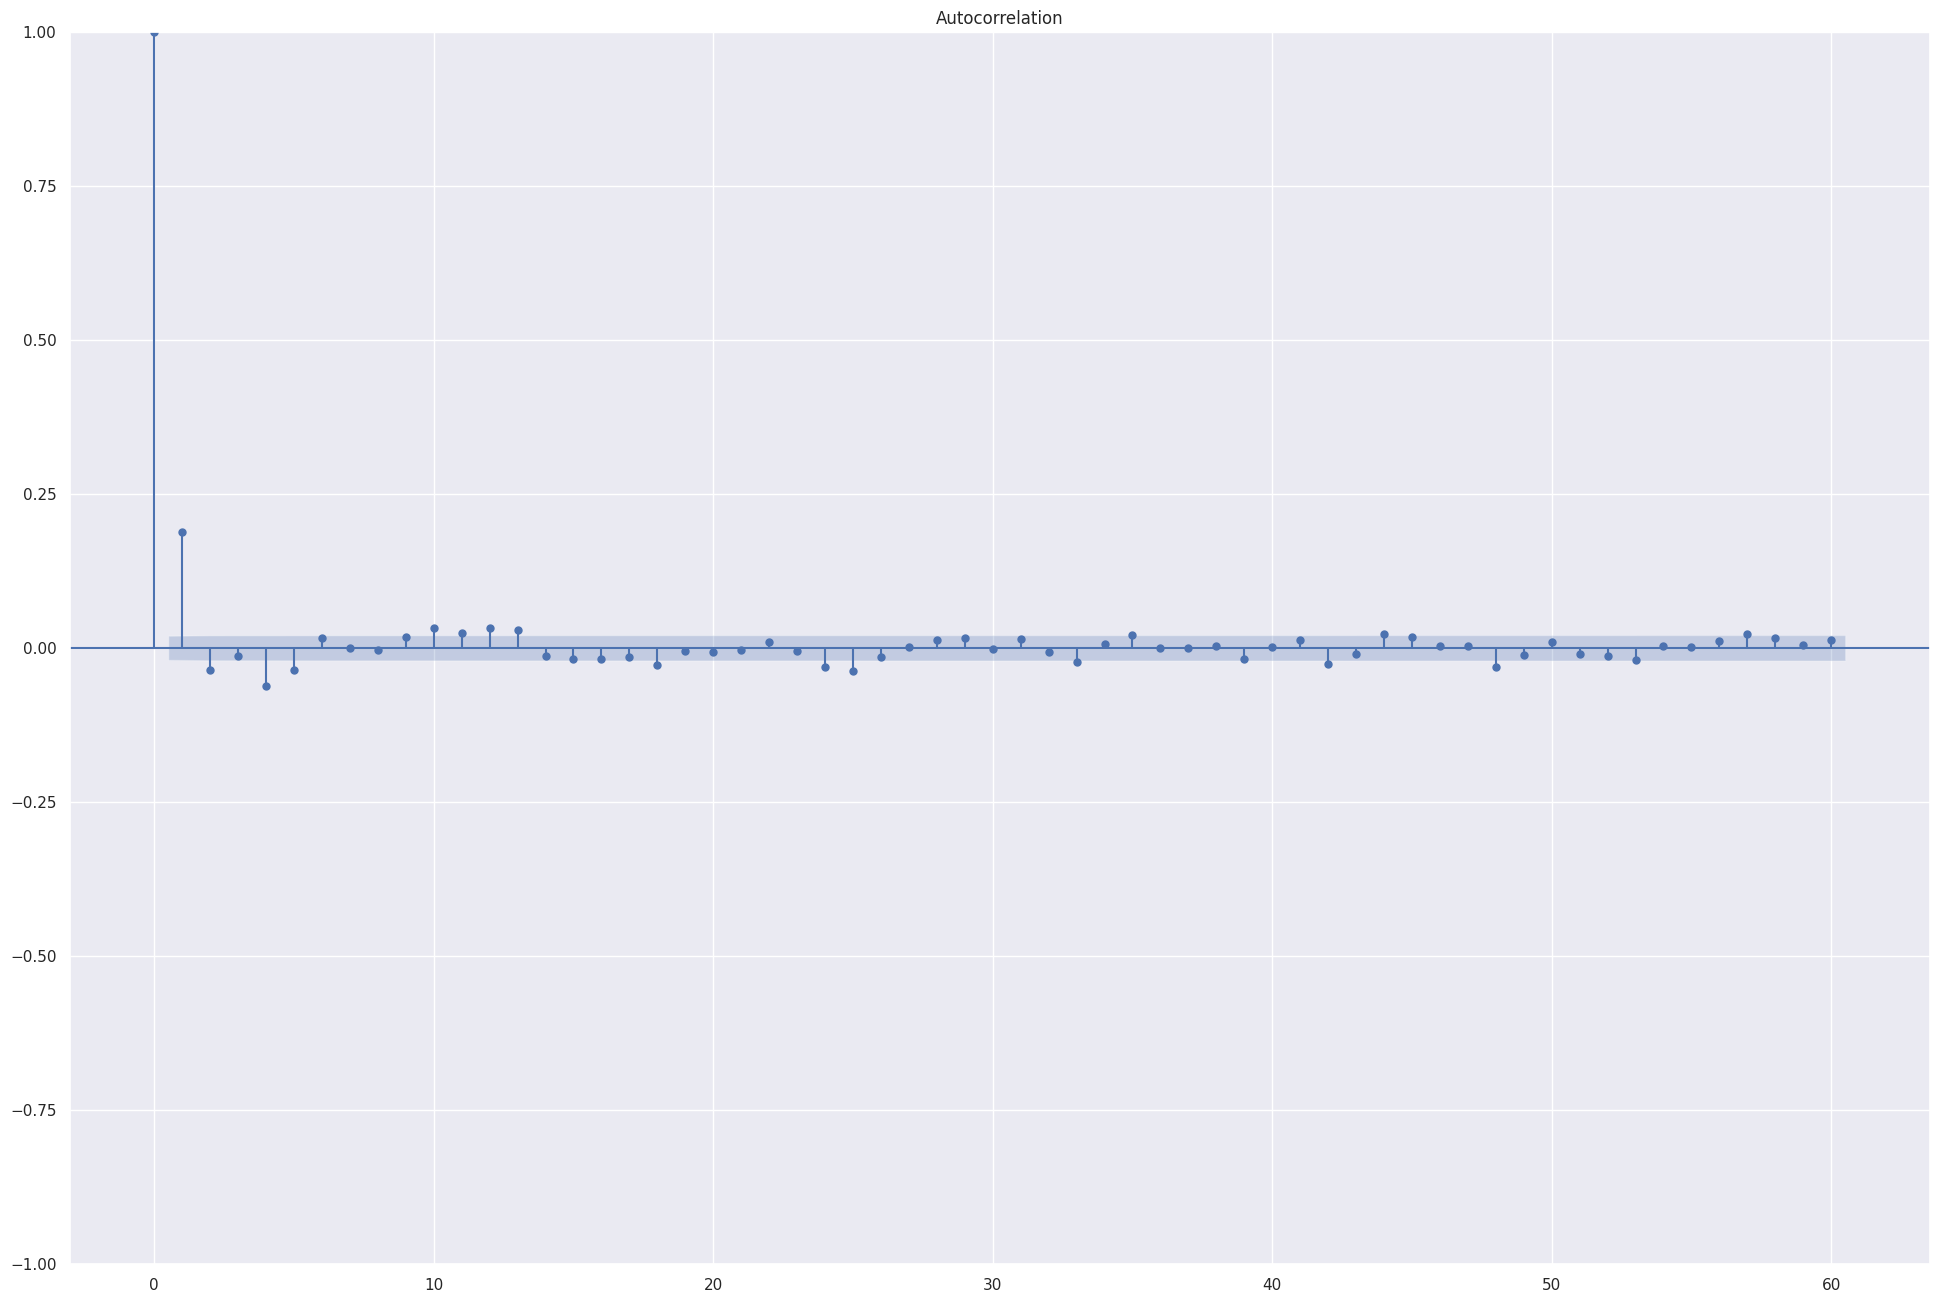

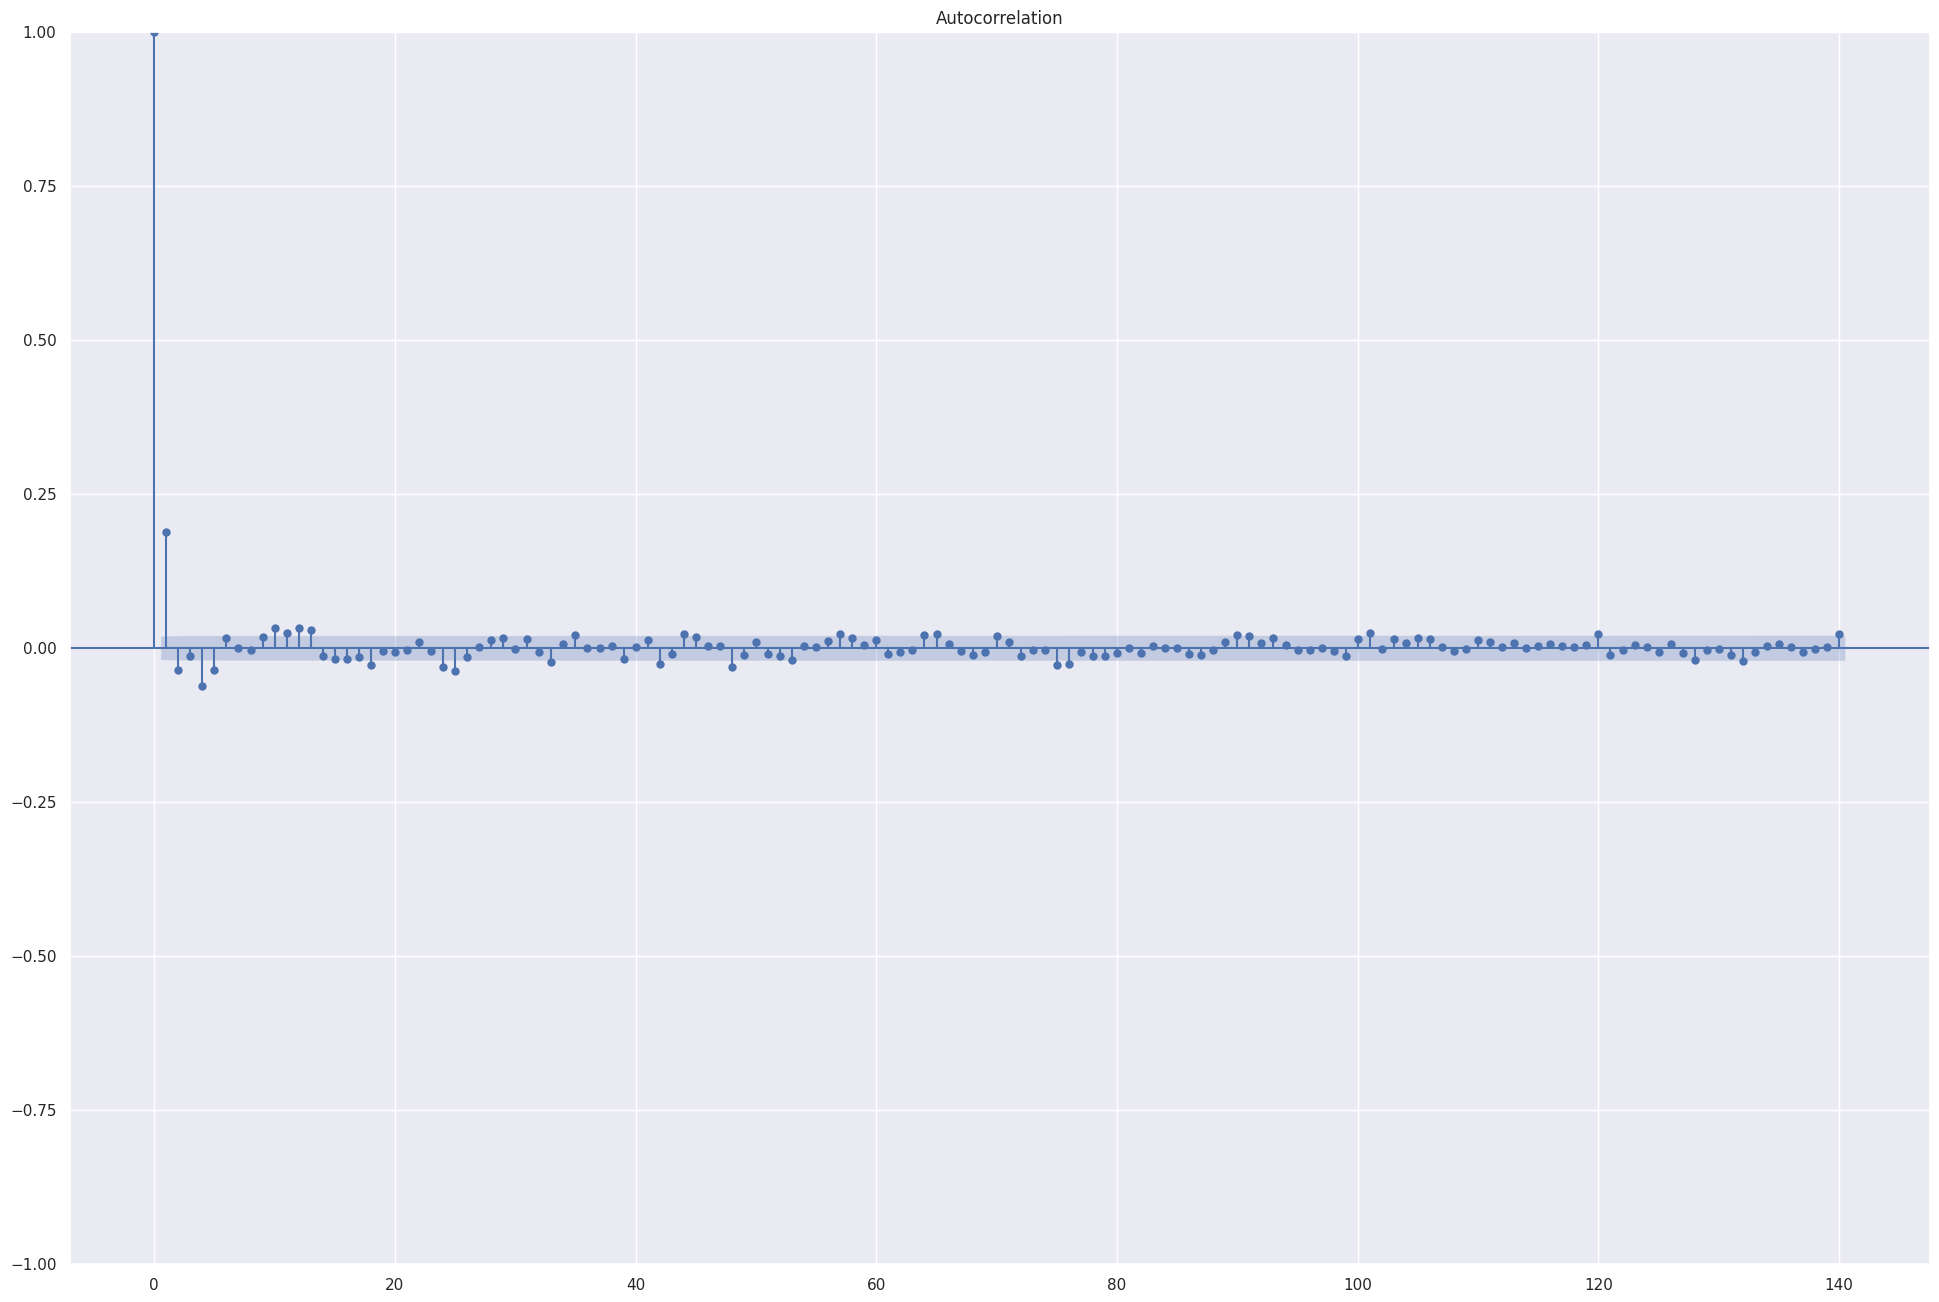

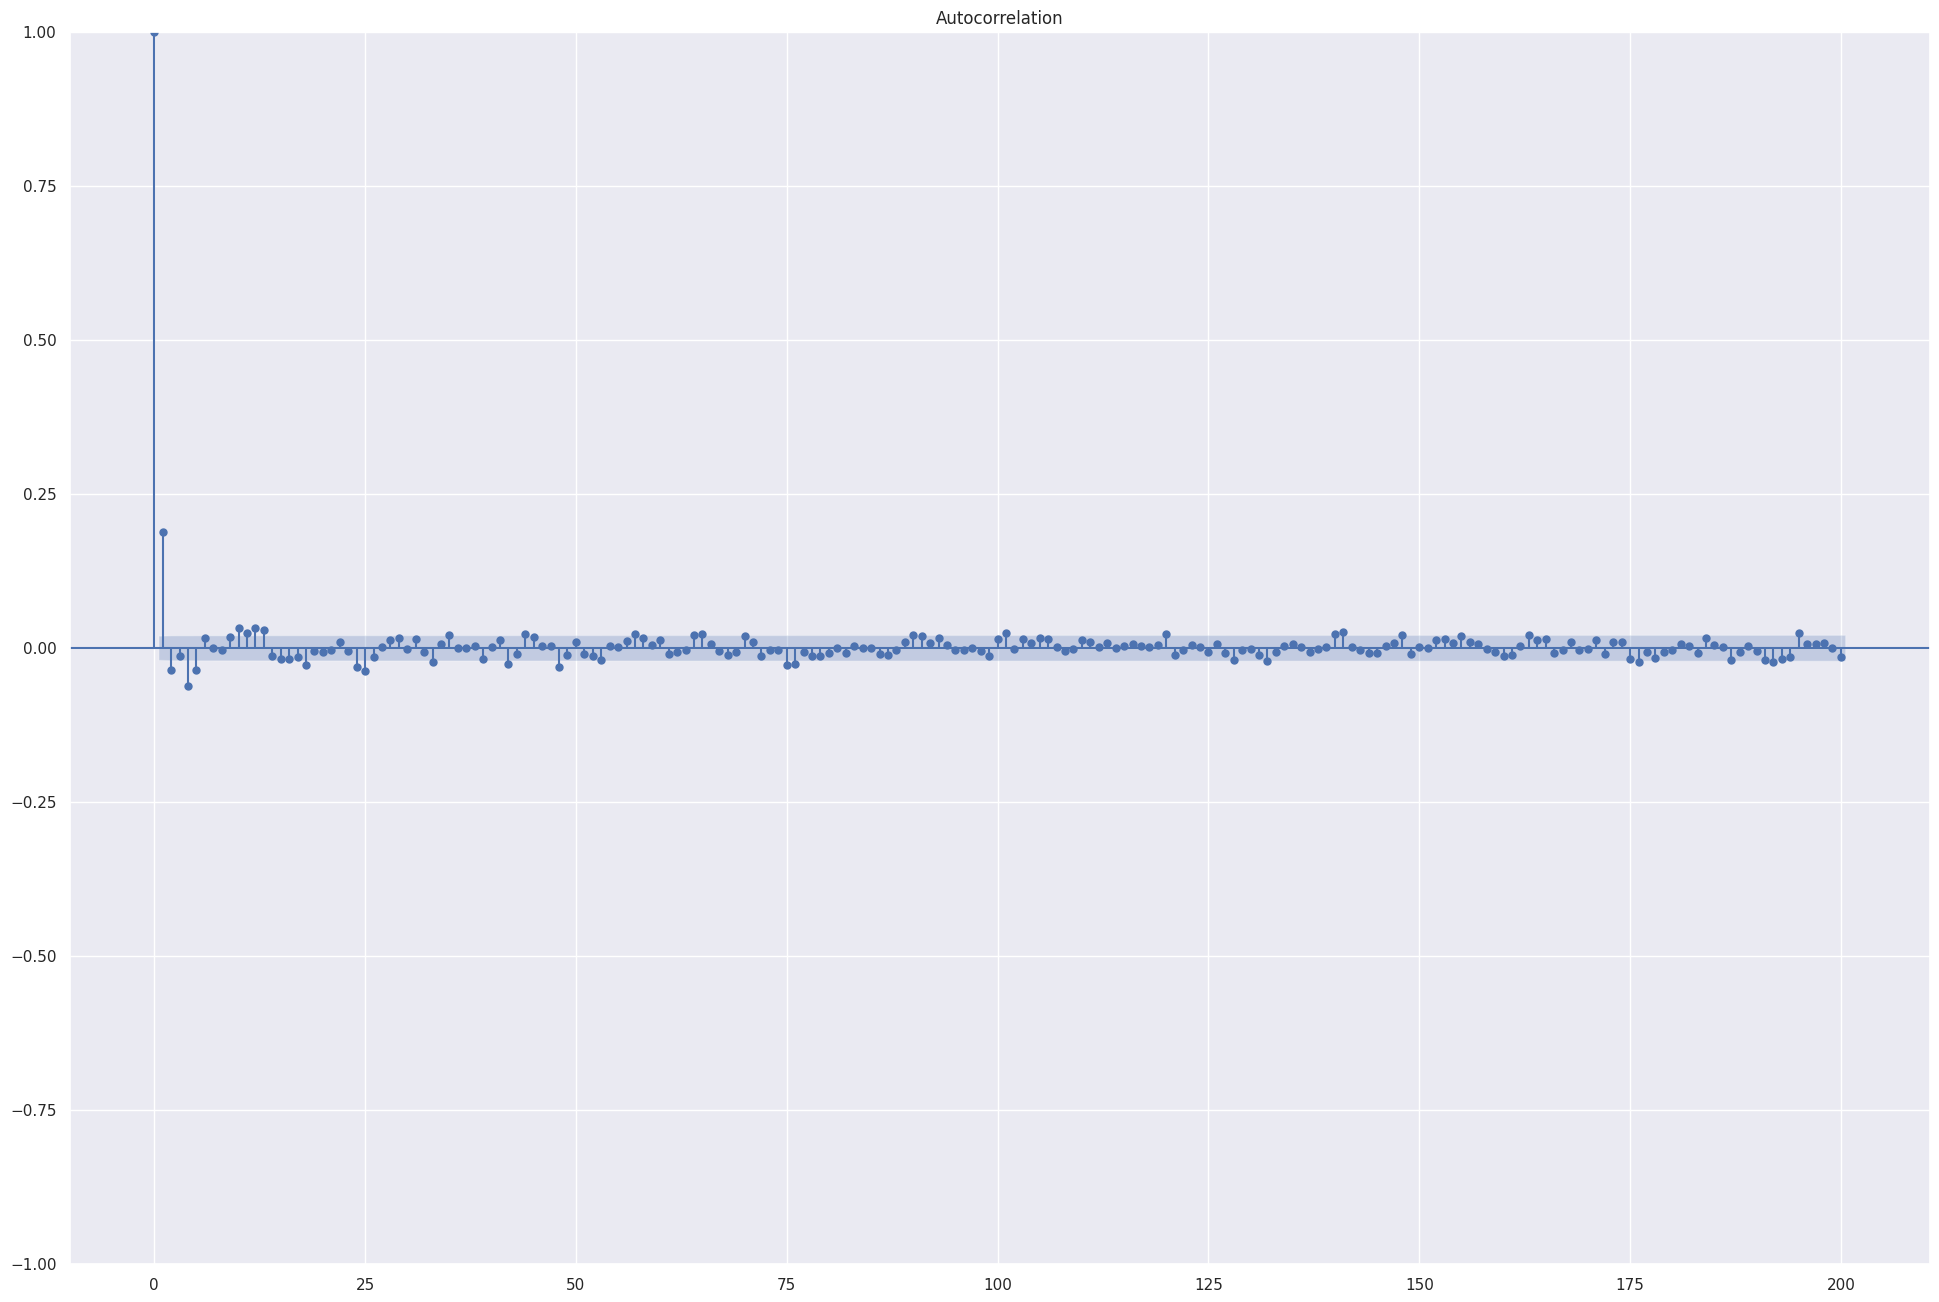

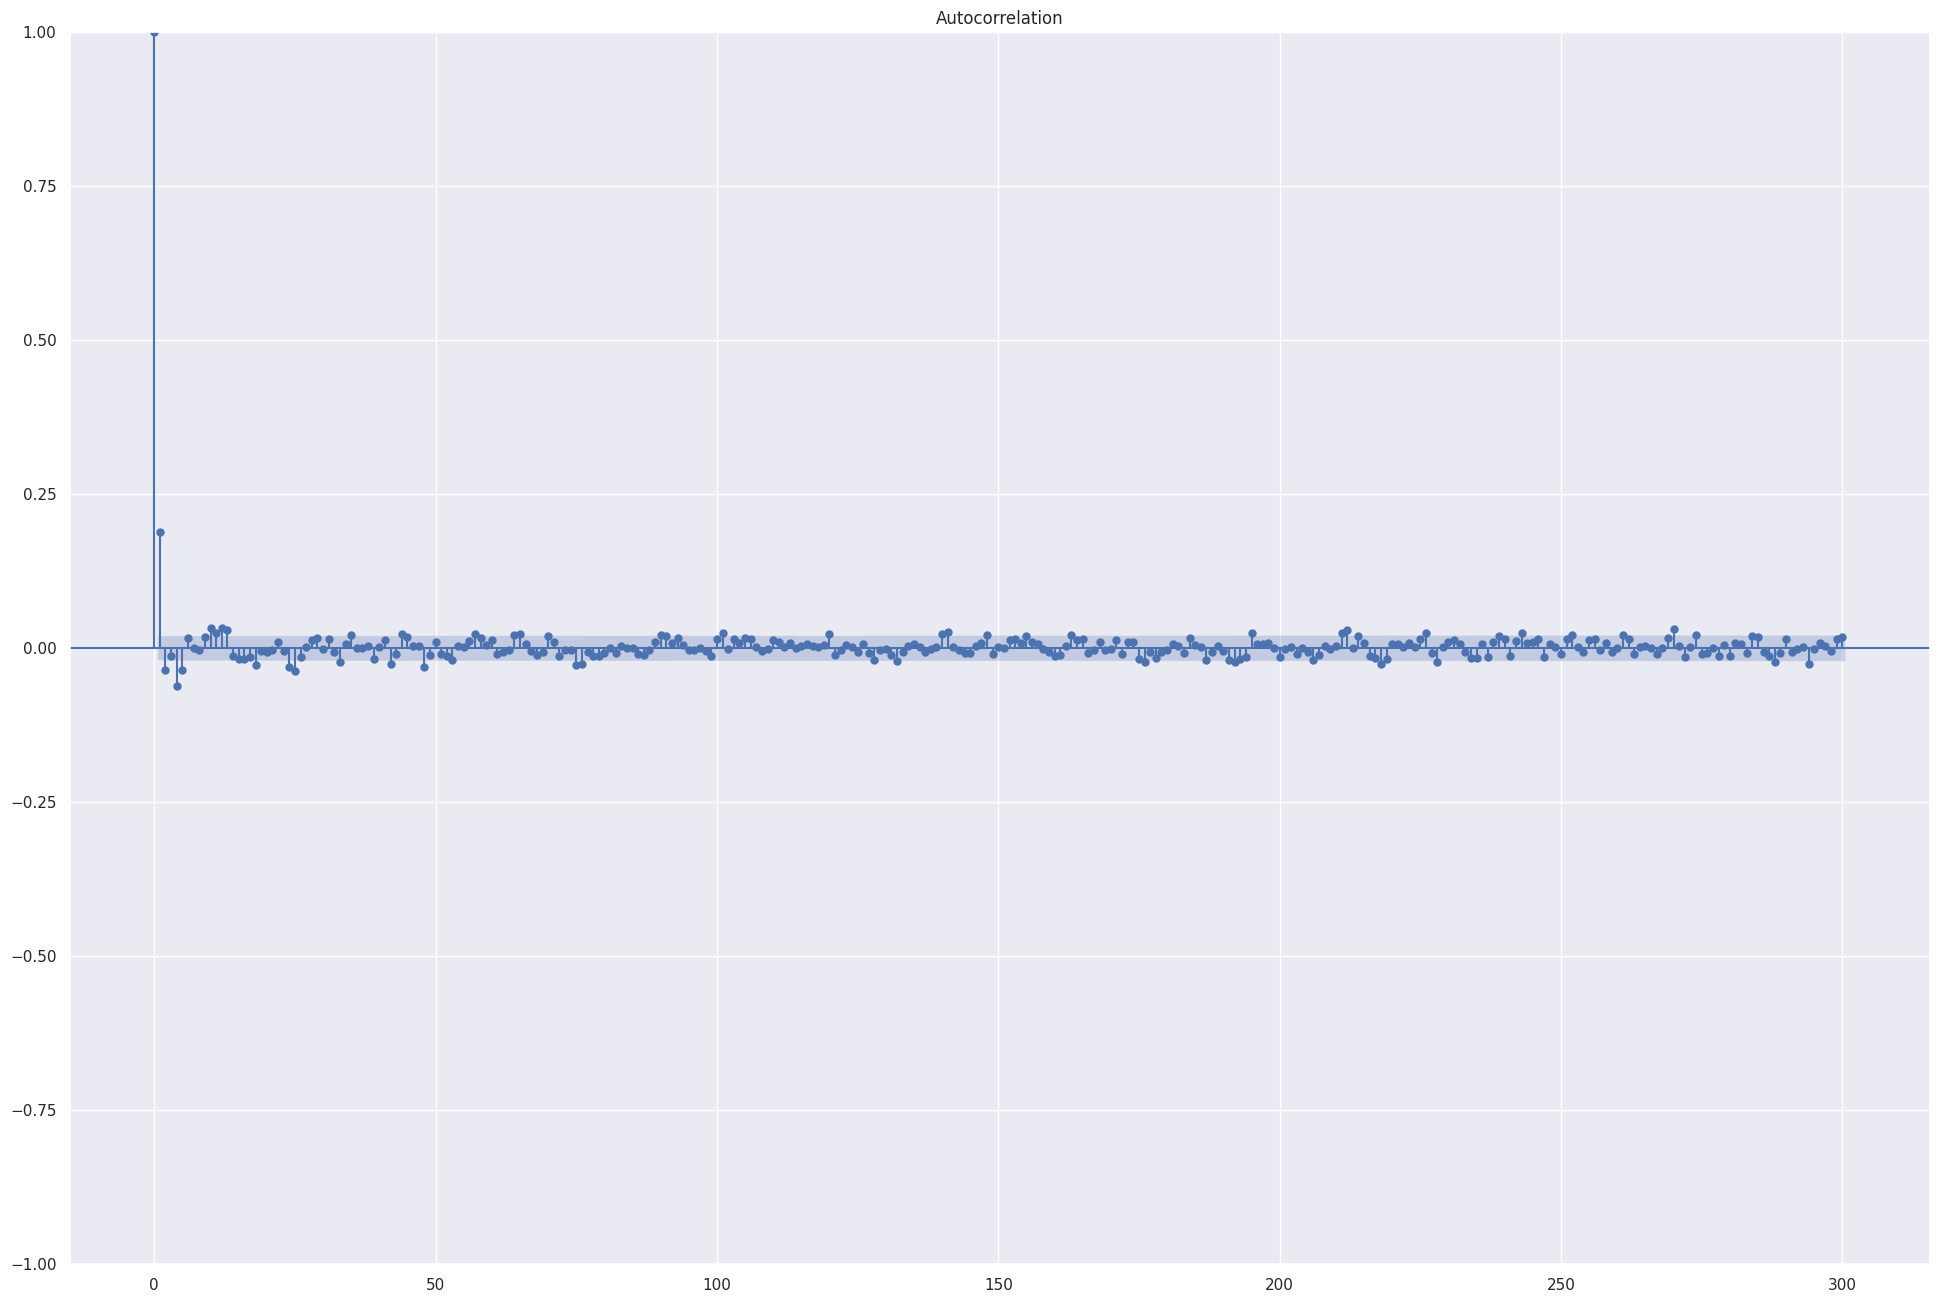

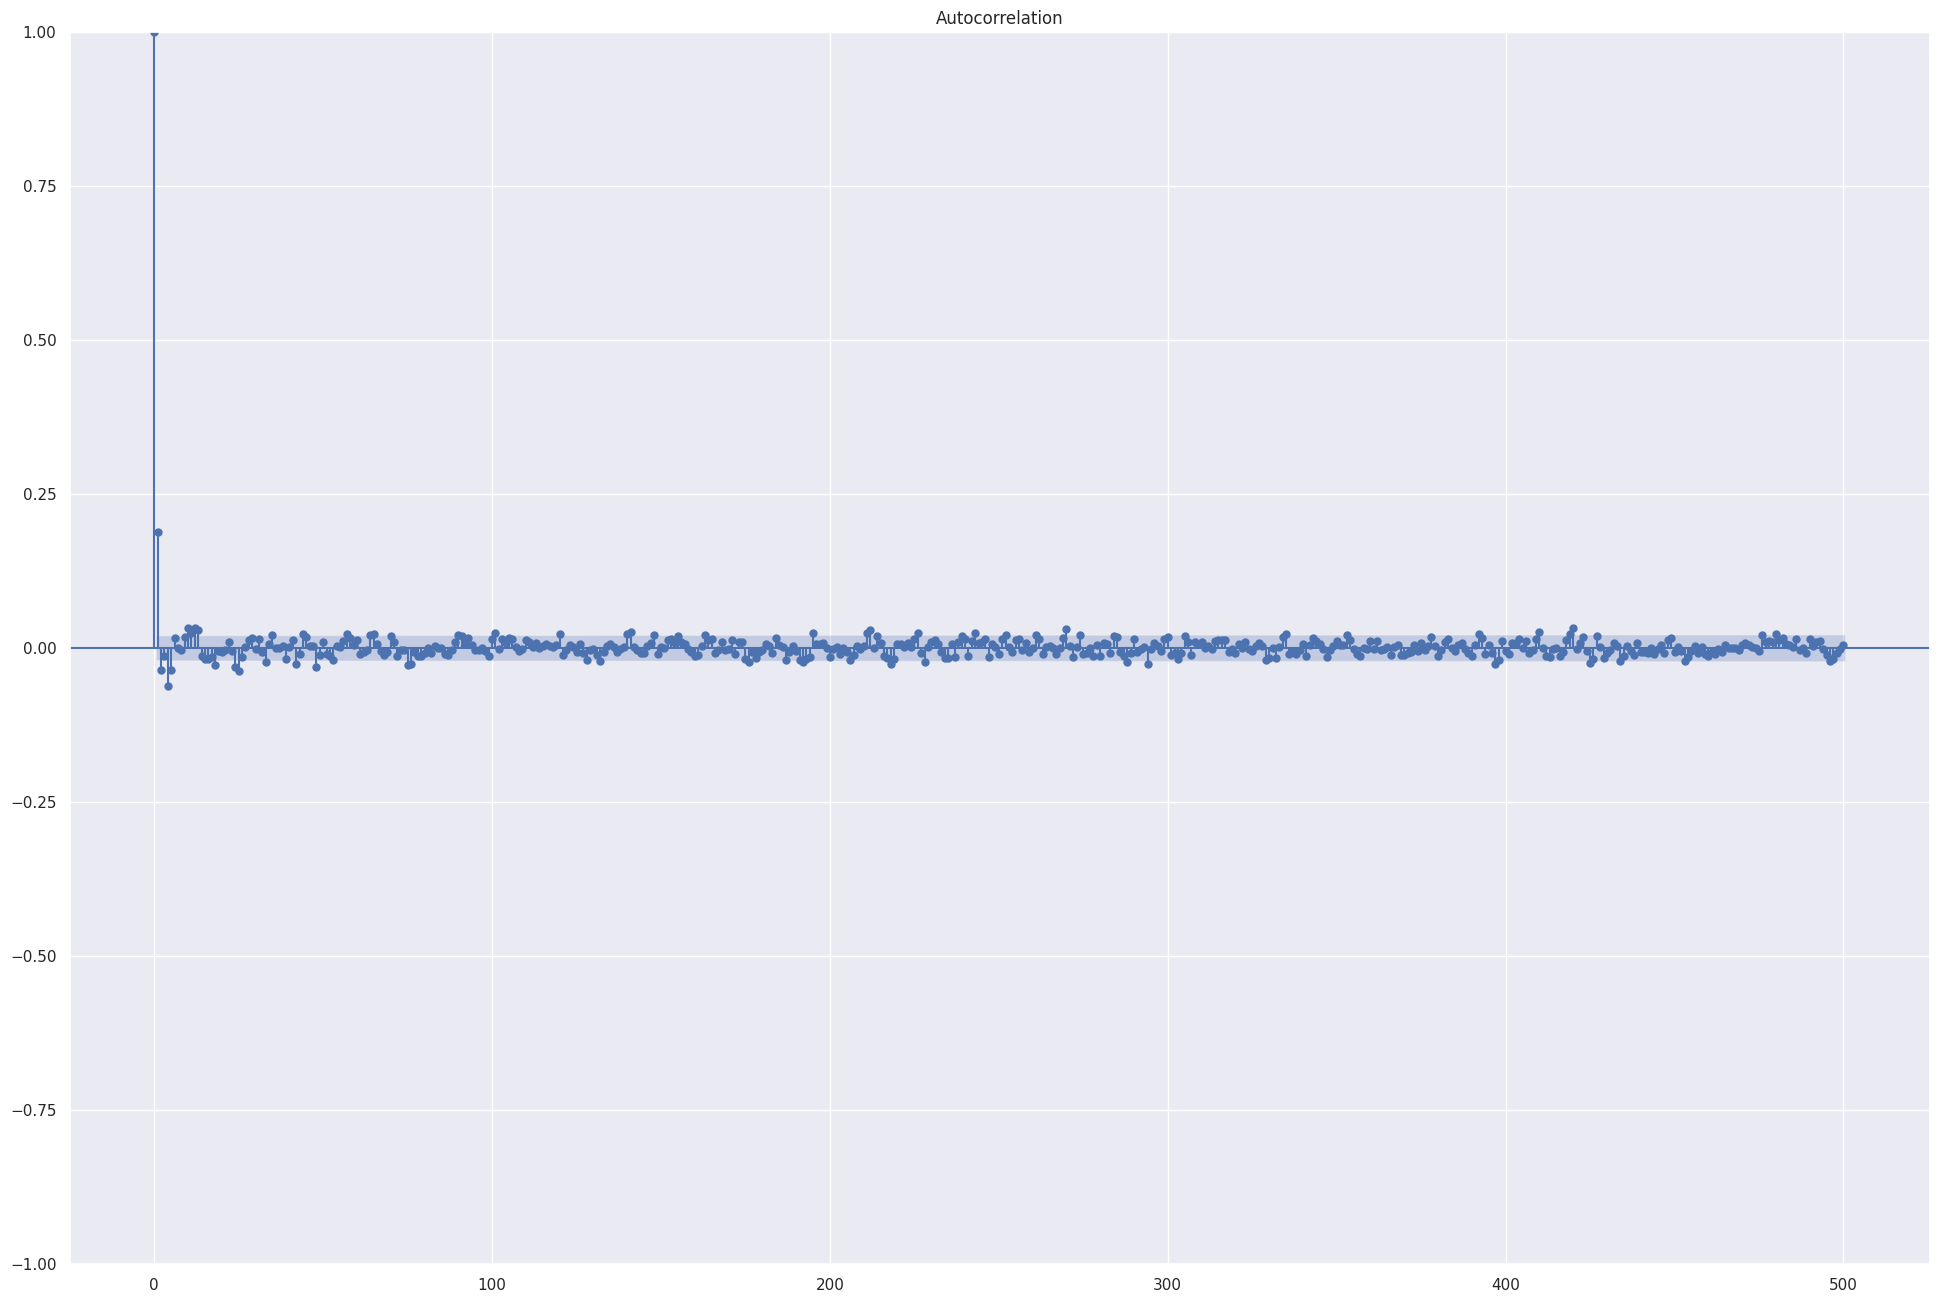

In [17]:
plot_acf(df['returns'].tail(10000), alpha=0.05,lags=20);
plot_acf(df['returns'].tail(10000), alpha=0.05,lags=60);
plot_acf(df['returns'].tail(10000), alpha=0.05,lags=140);
plot_acf(df['returns'].tail(10000), alpha=0.05,lags=200);
plot_acf(df['returns'].tail(10000), alpha=0.05,lags=300);
plot_acf(df['returns'].tail(10000), alpha=0.05,lags=500);

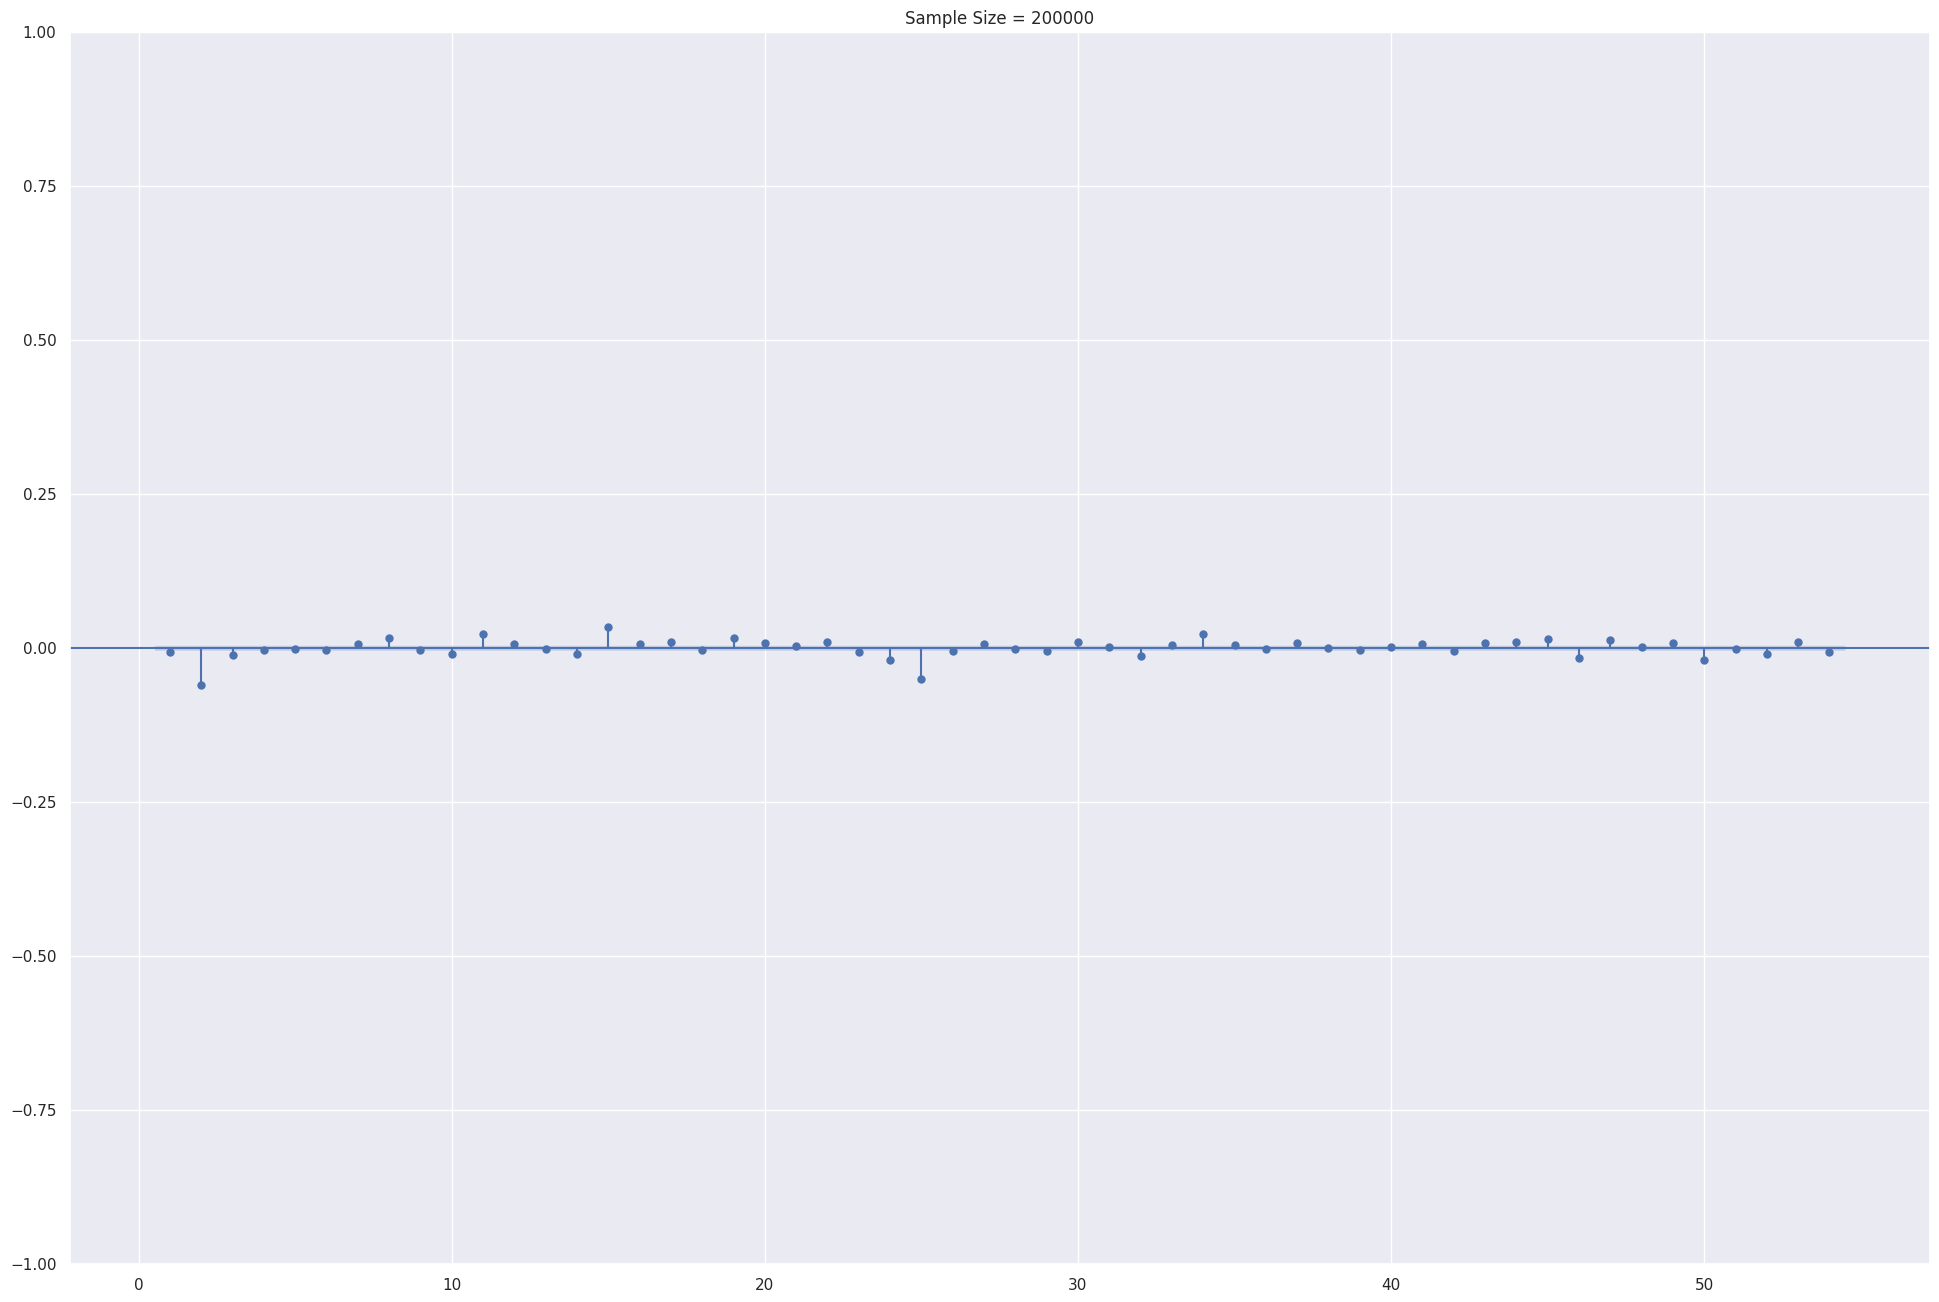

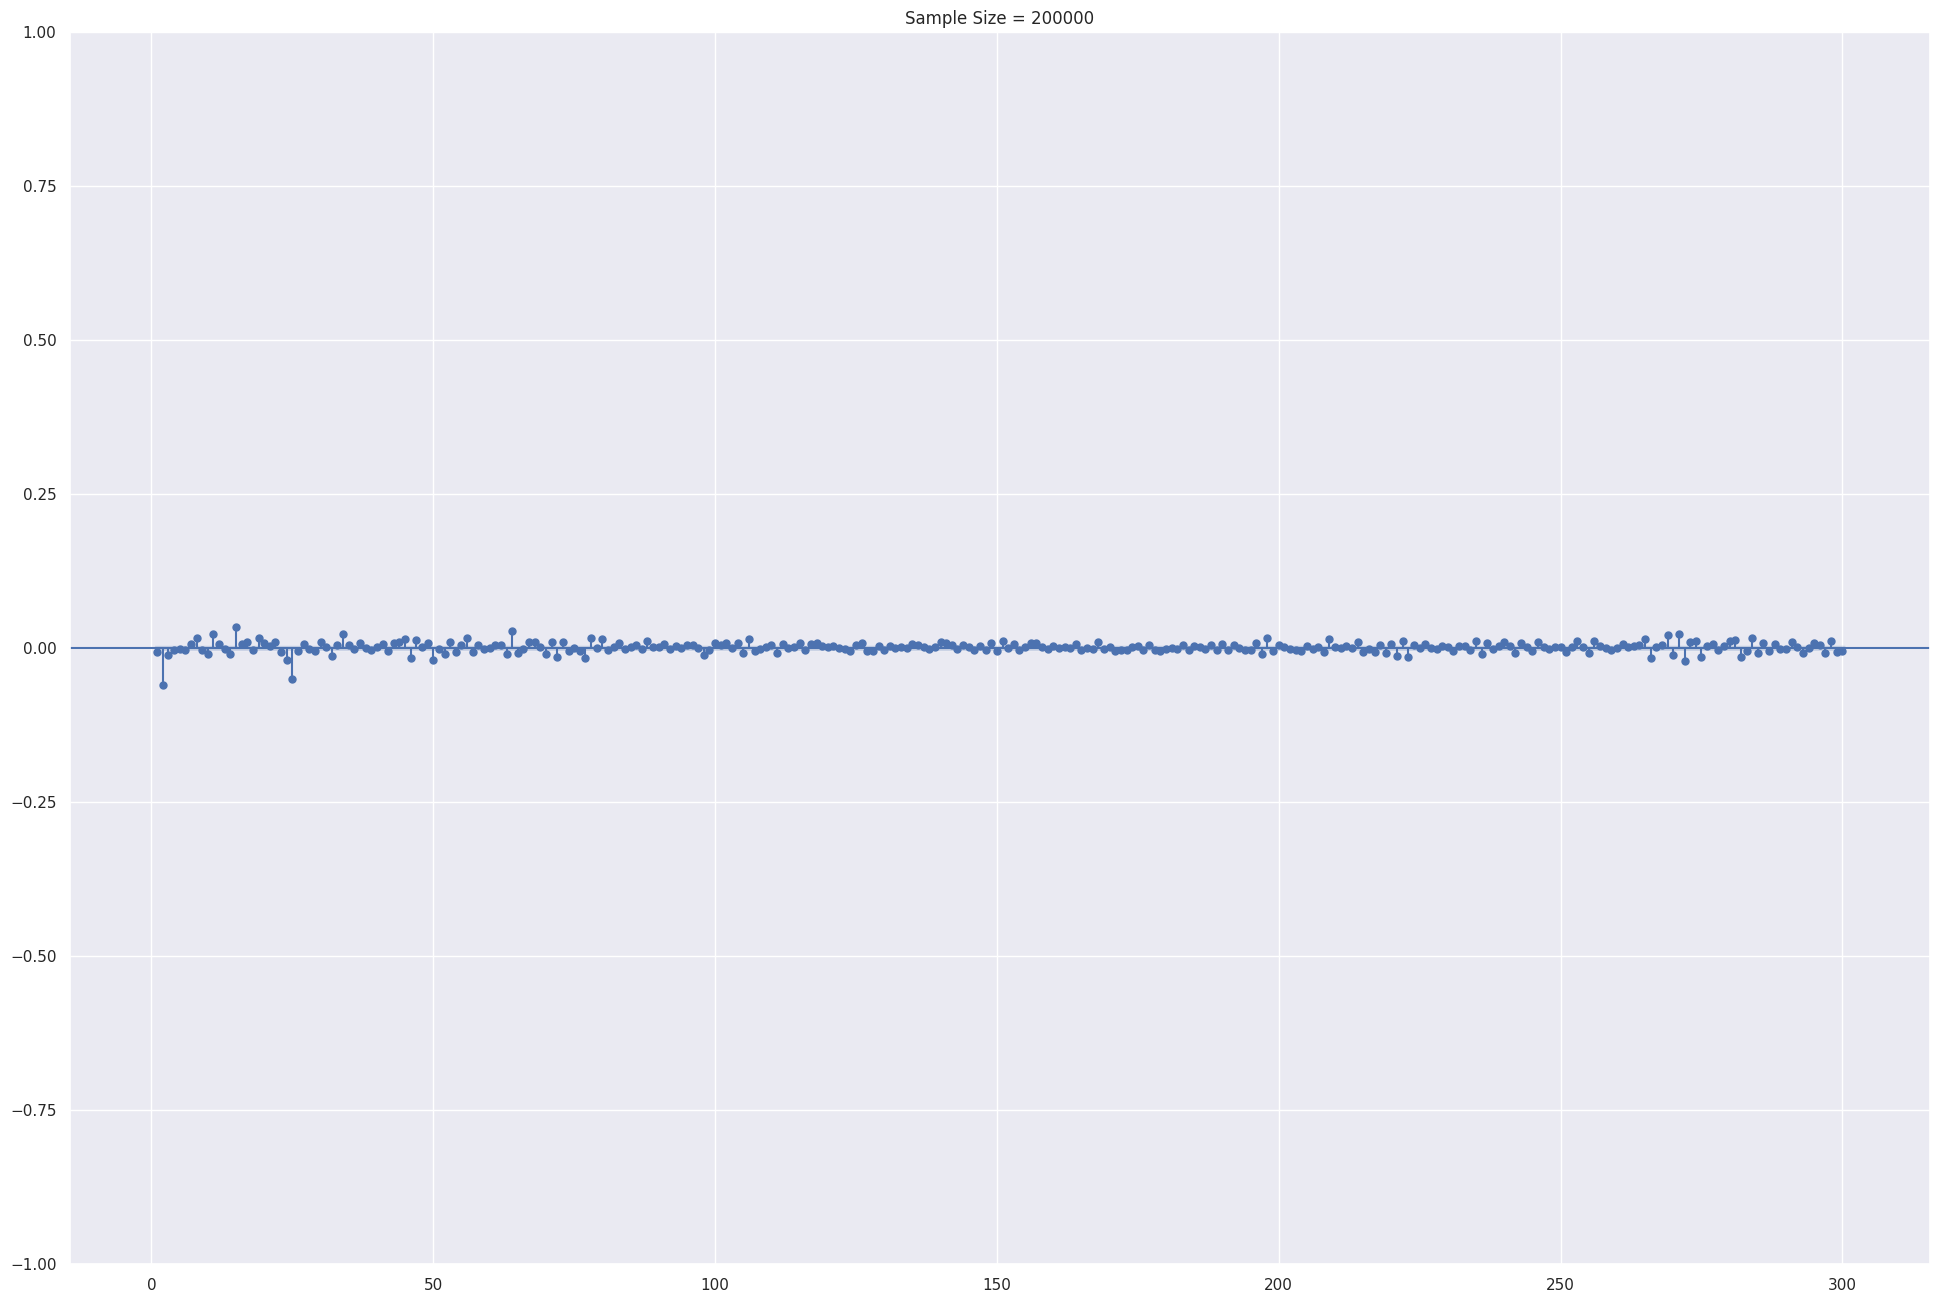

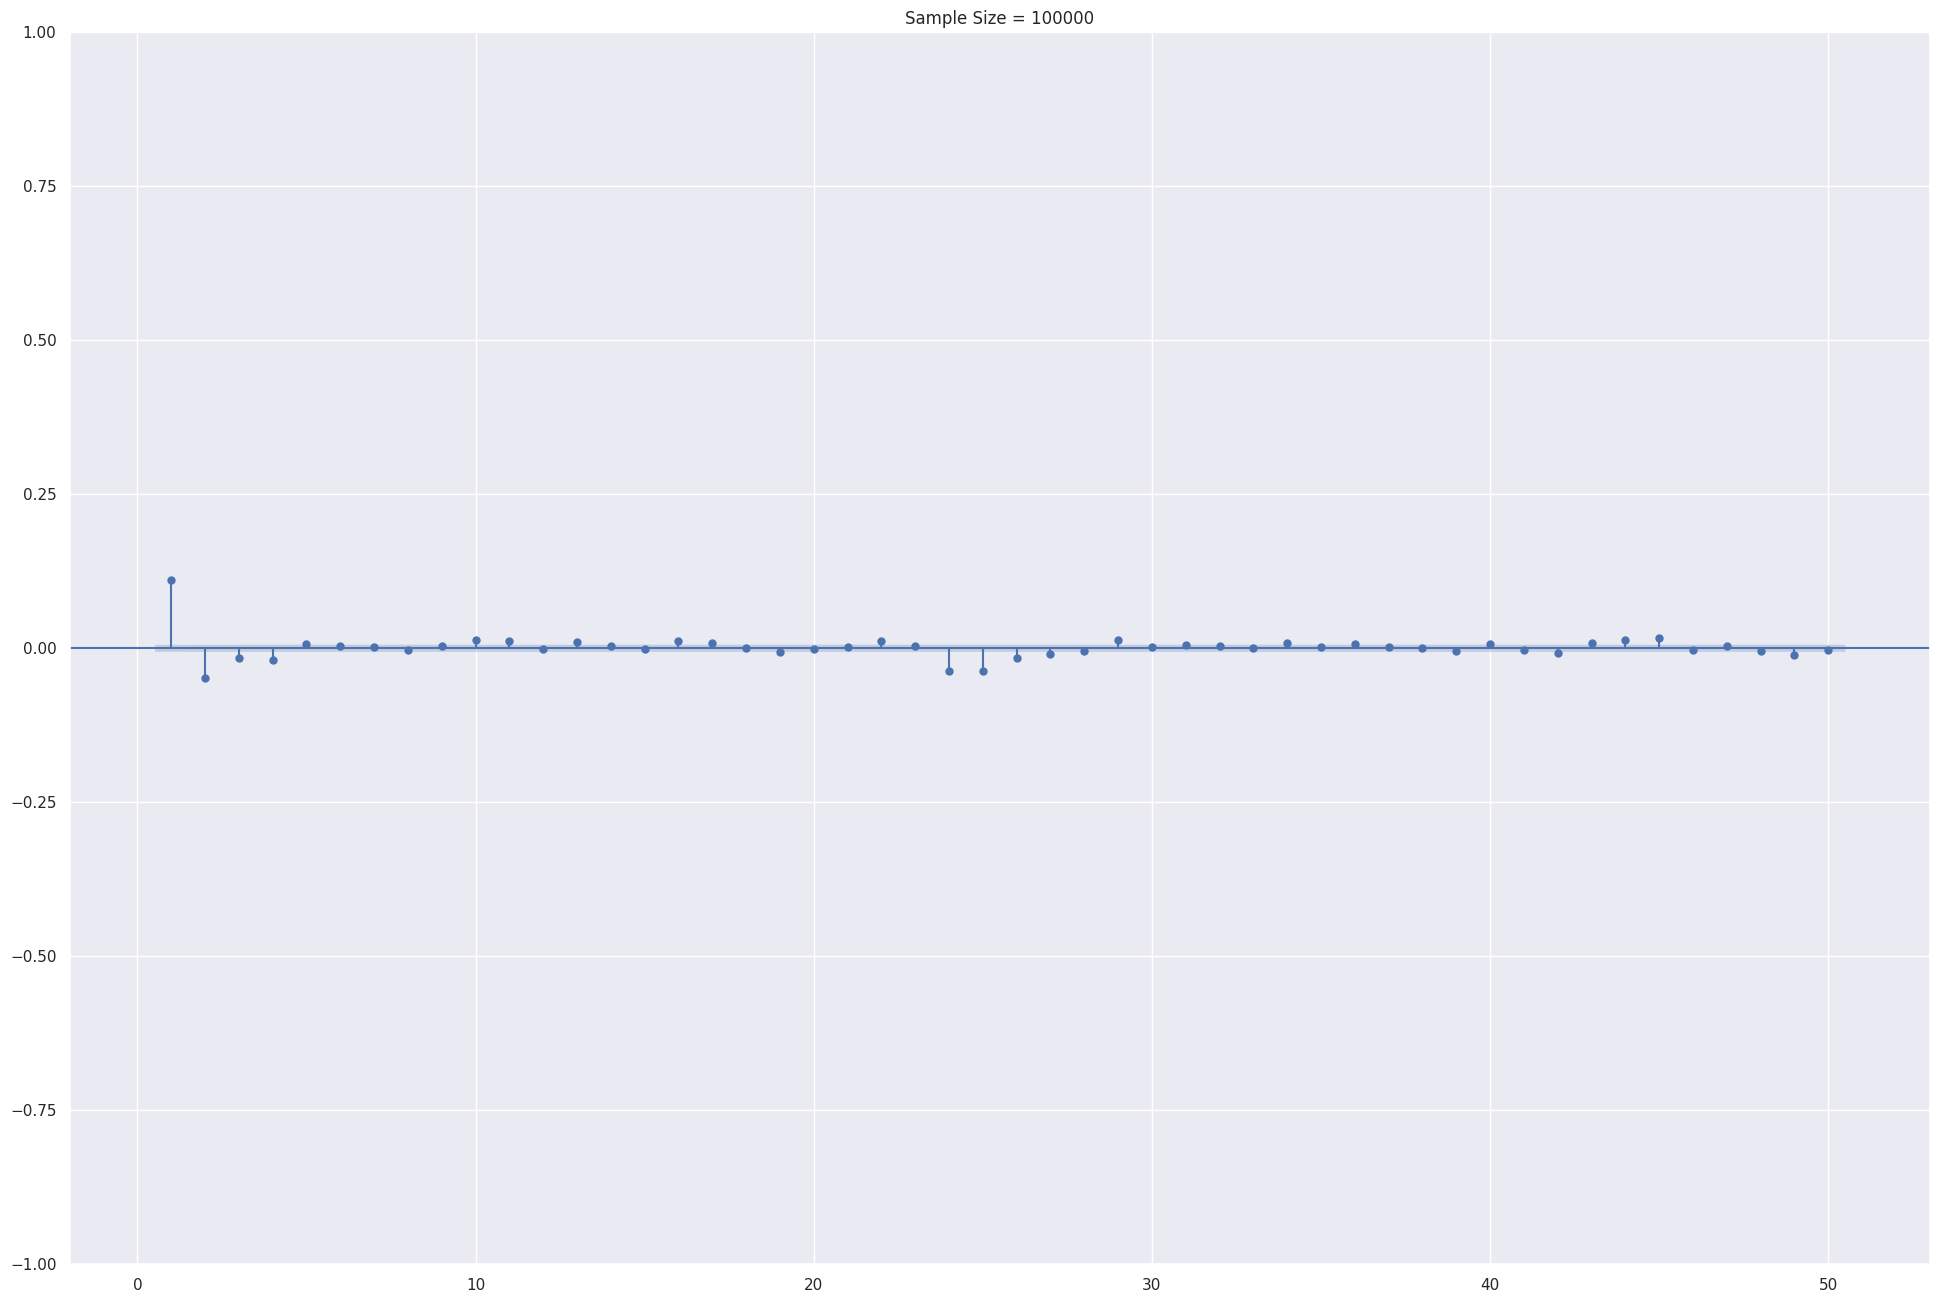

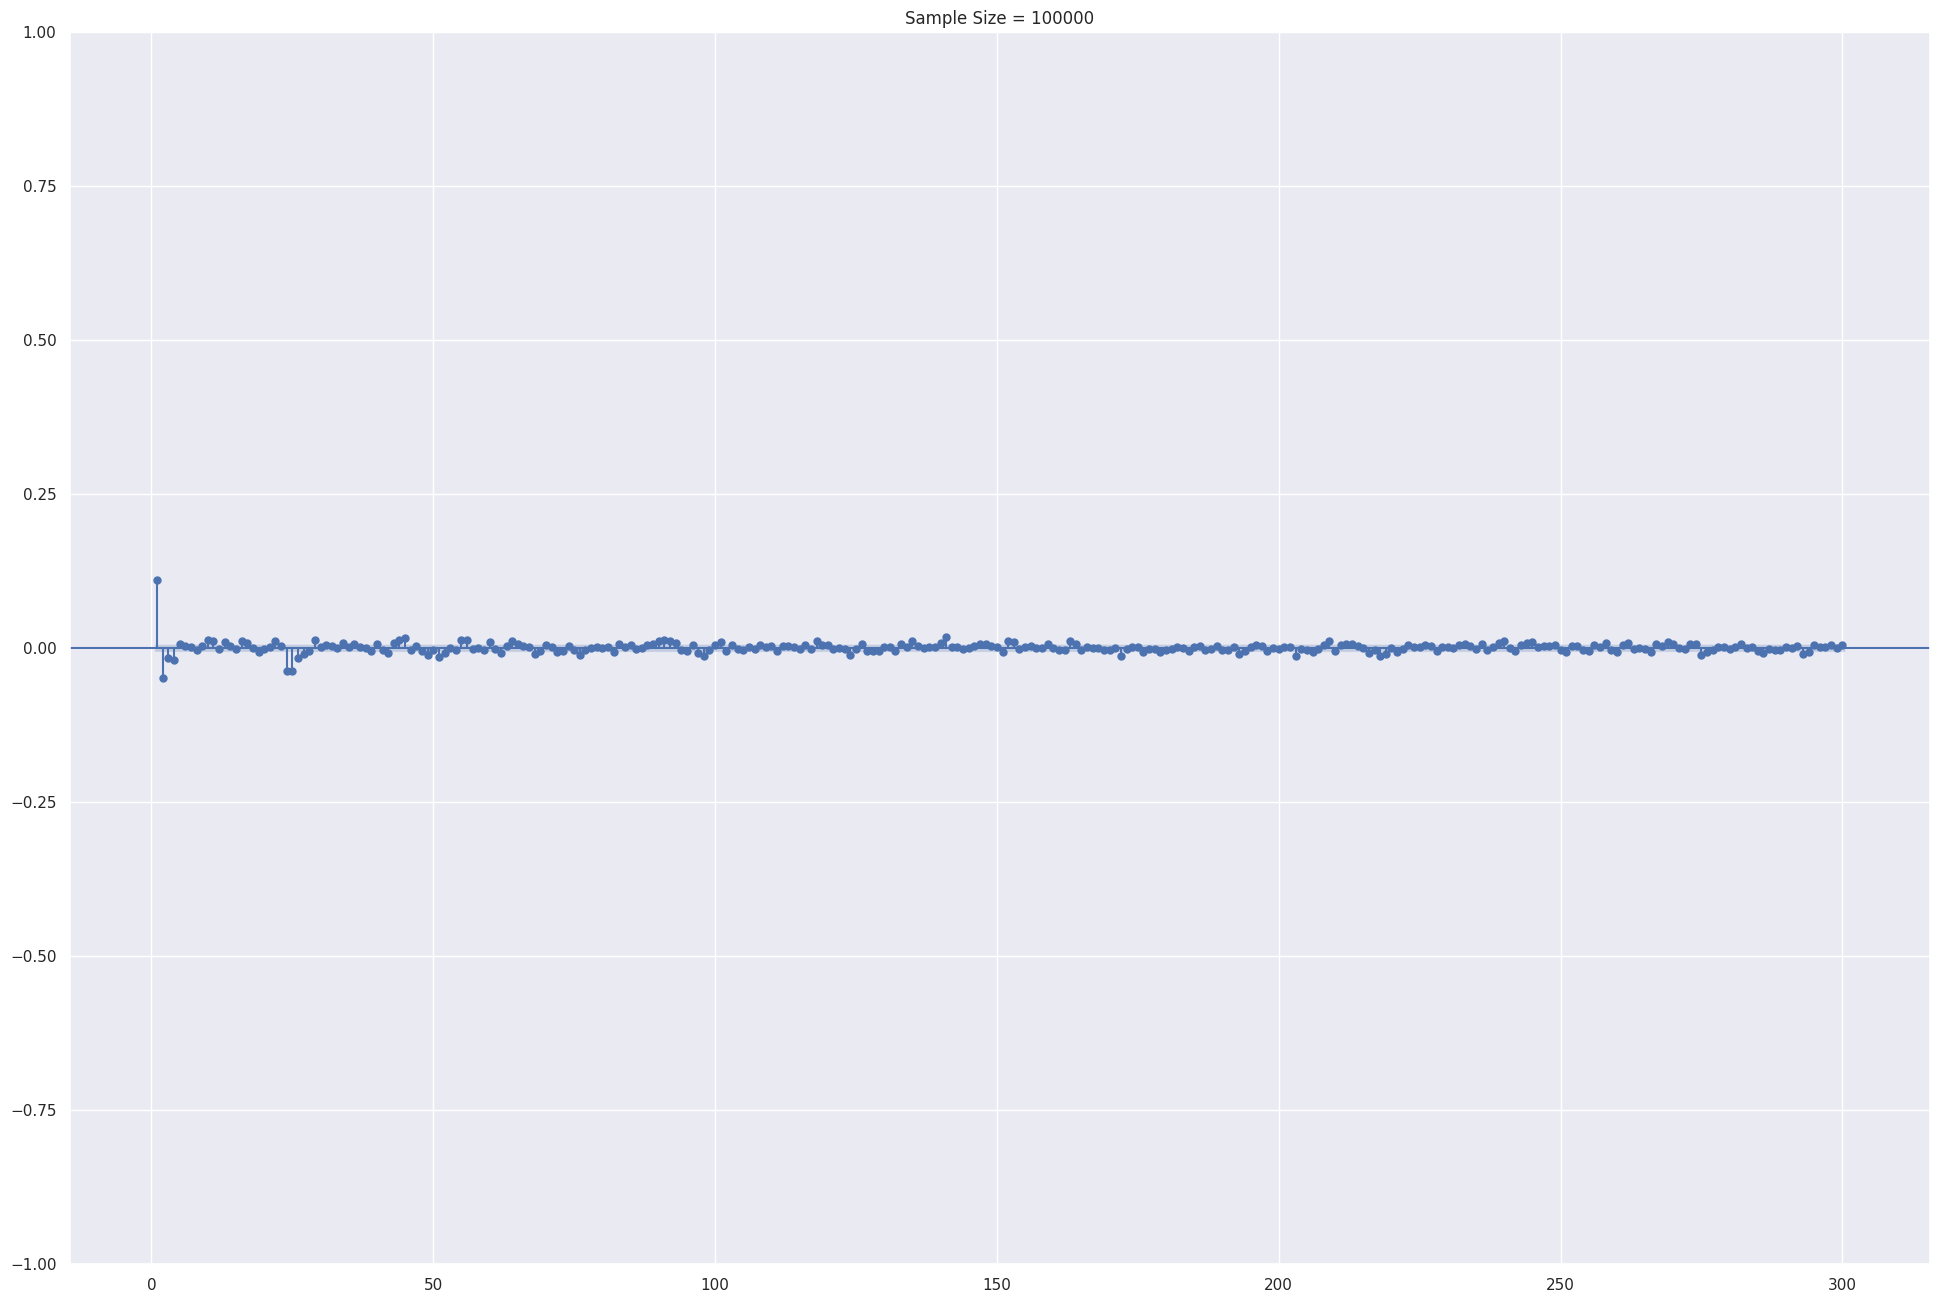

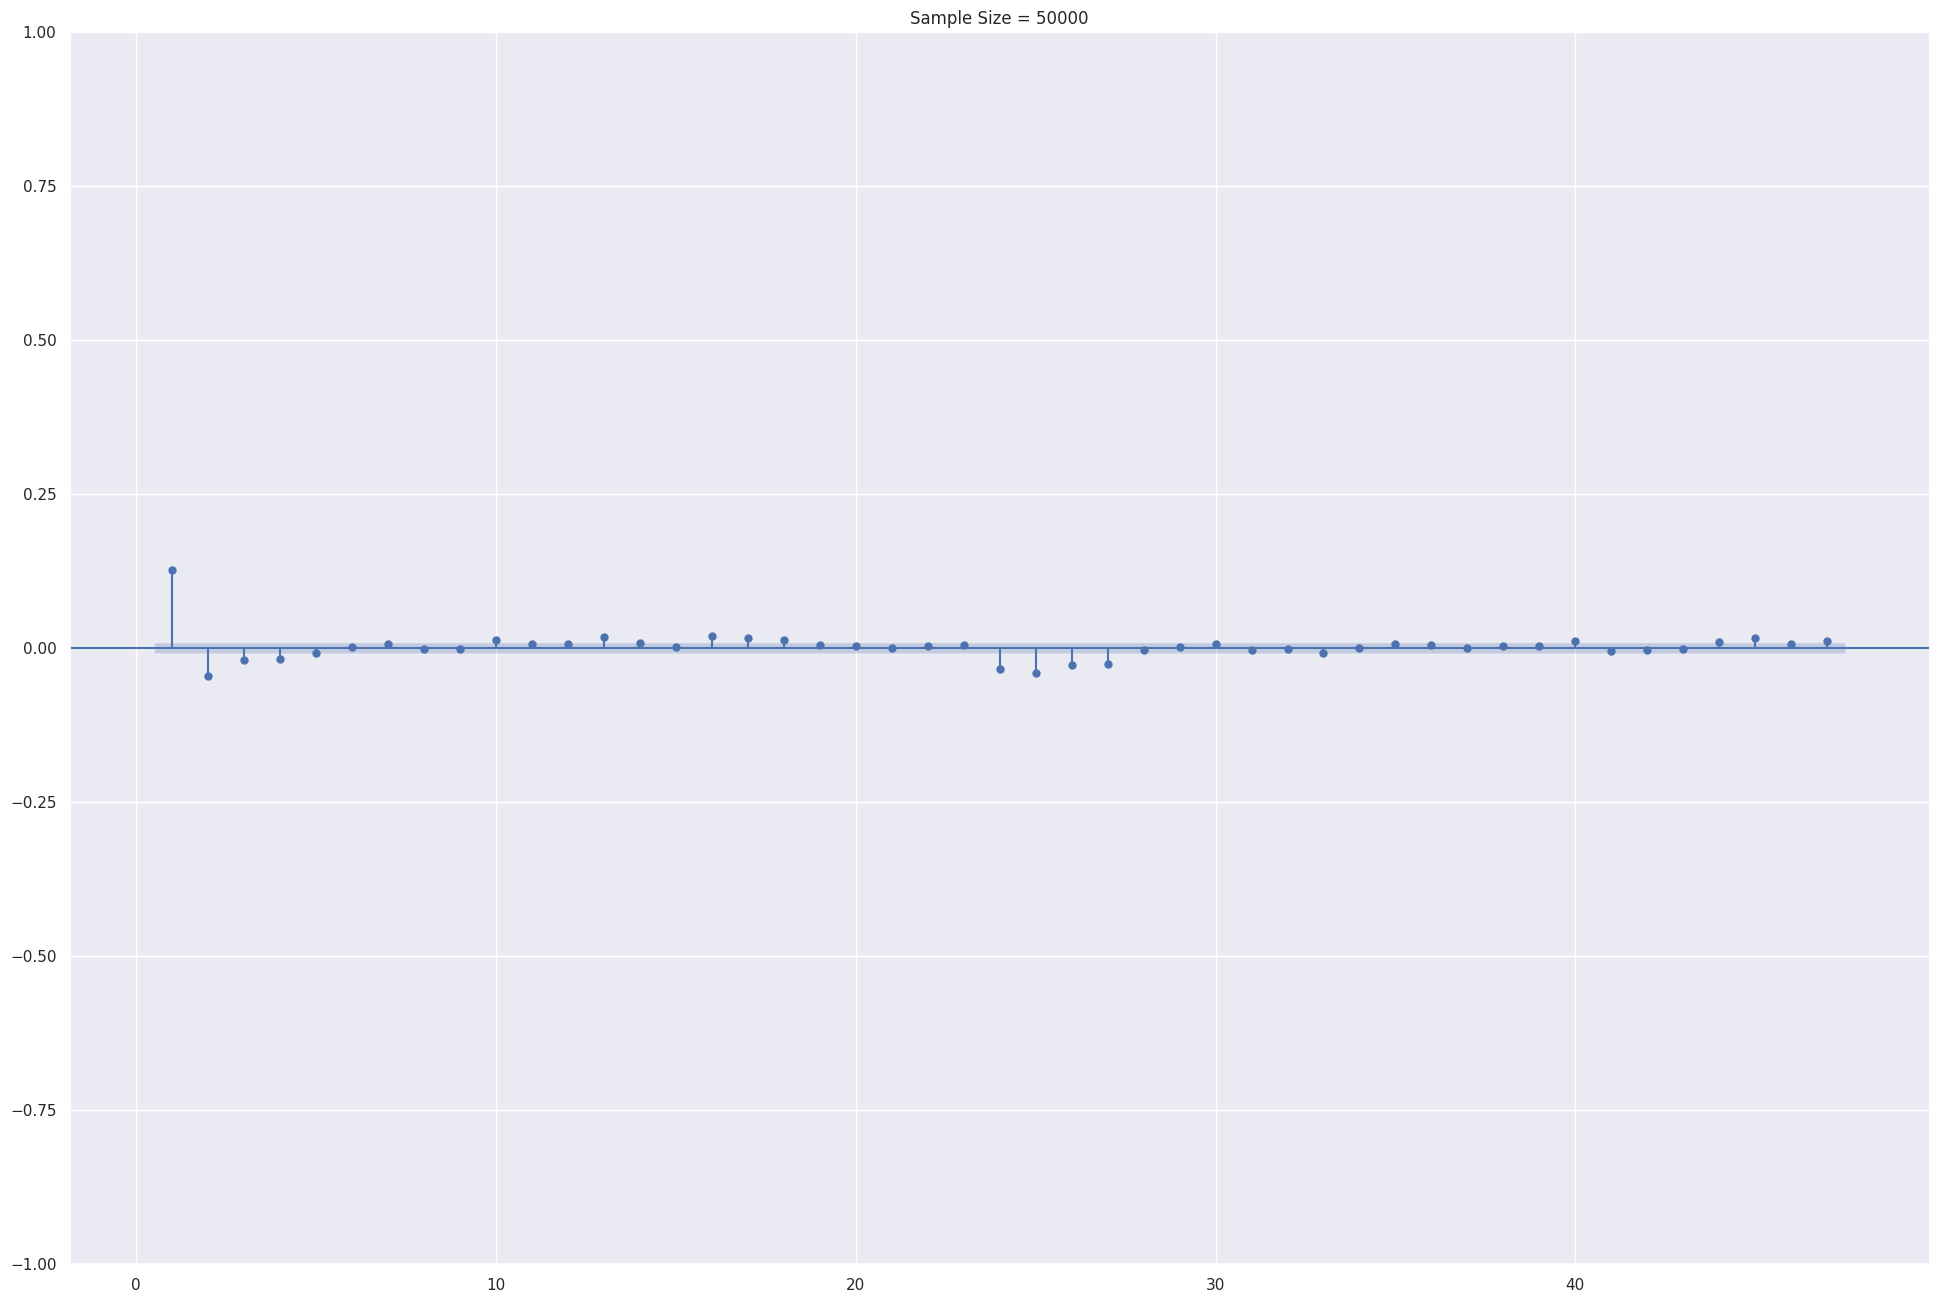

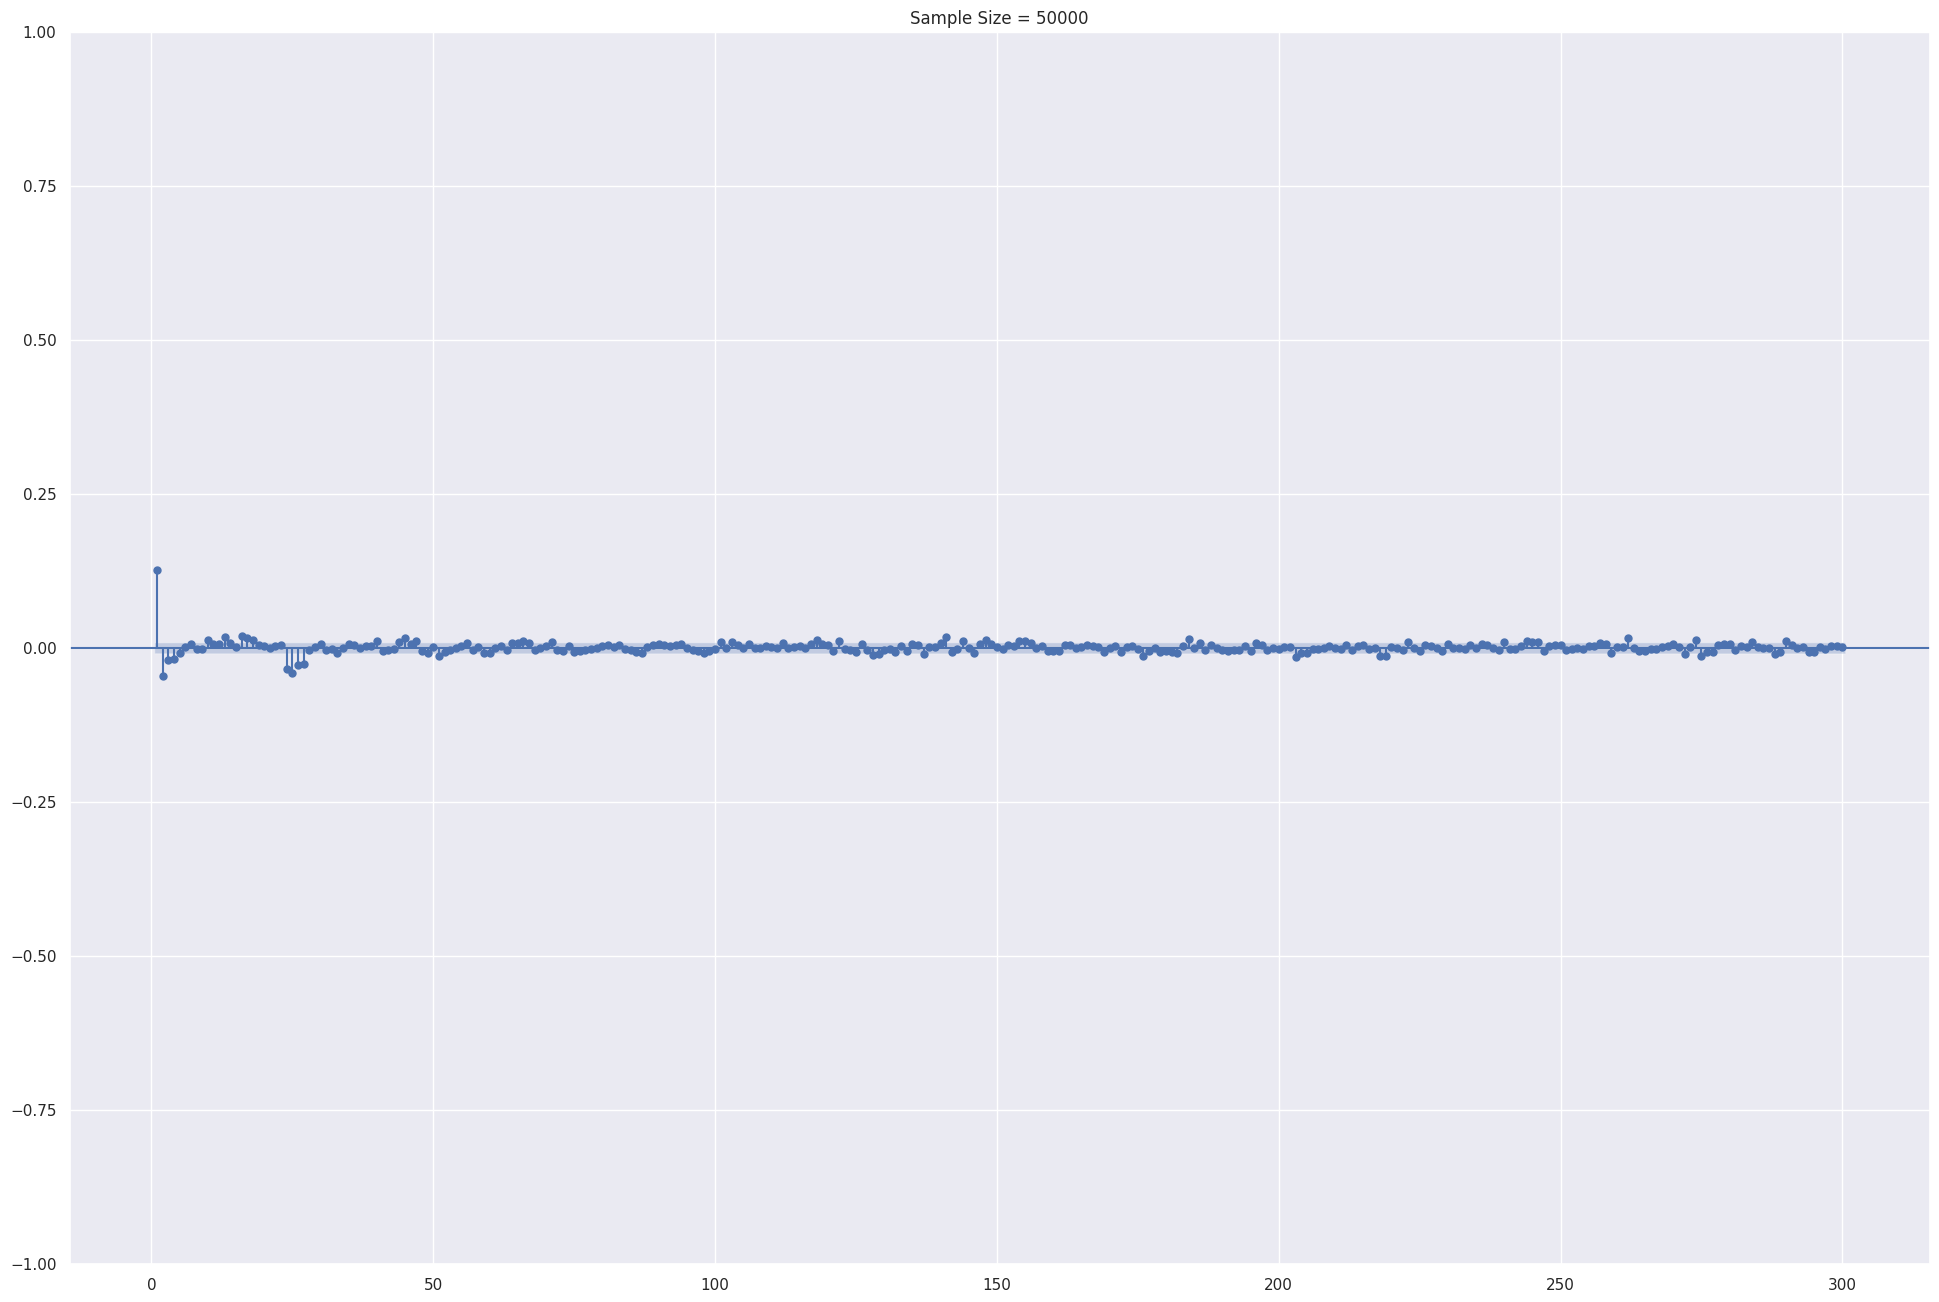

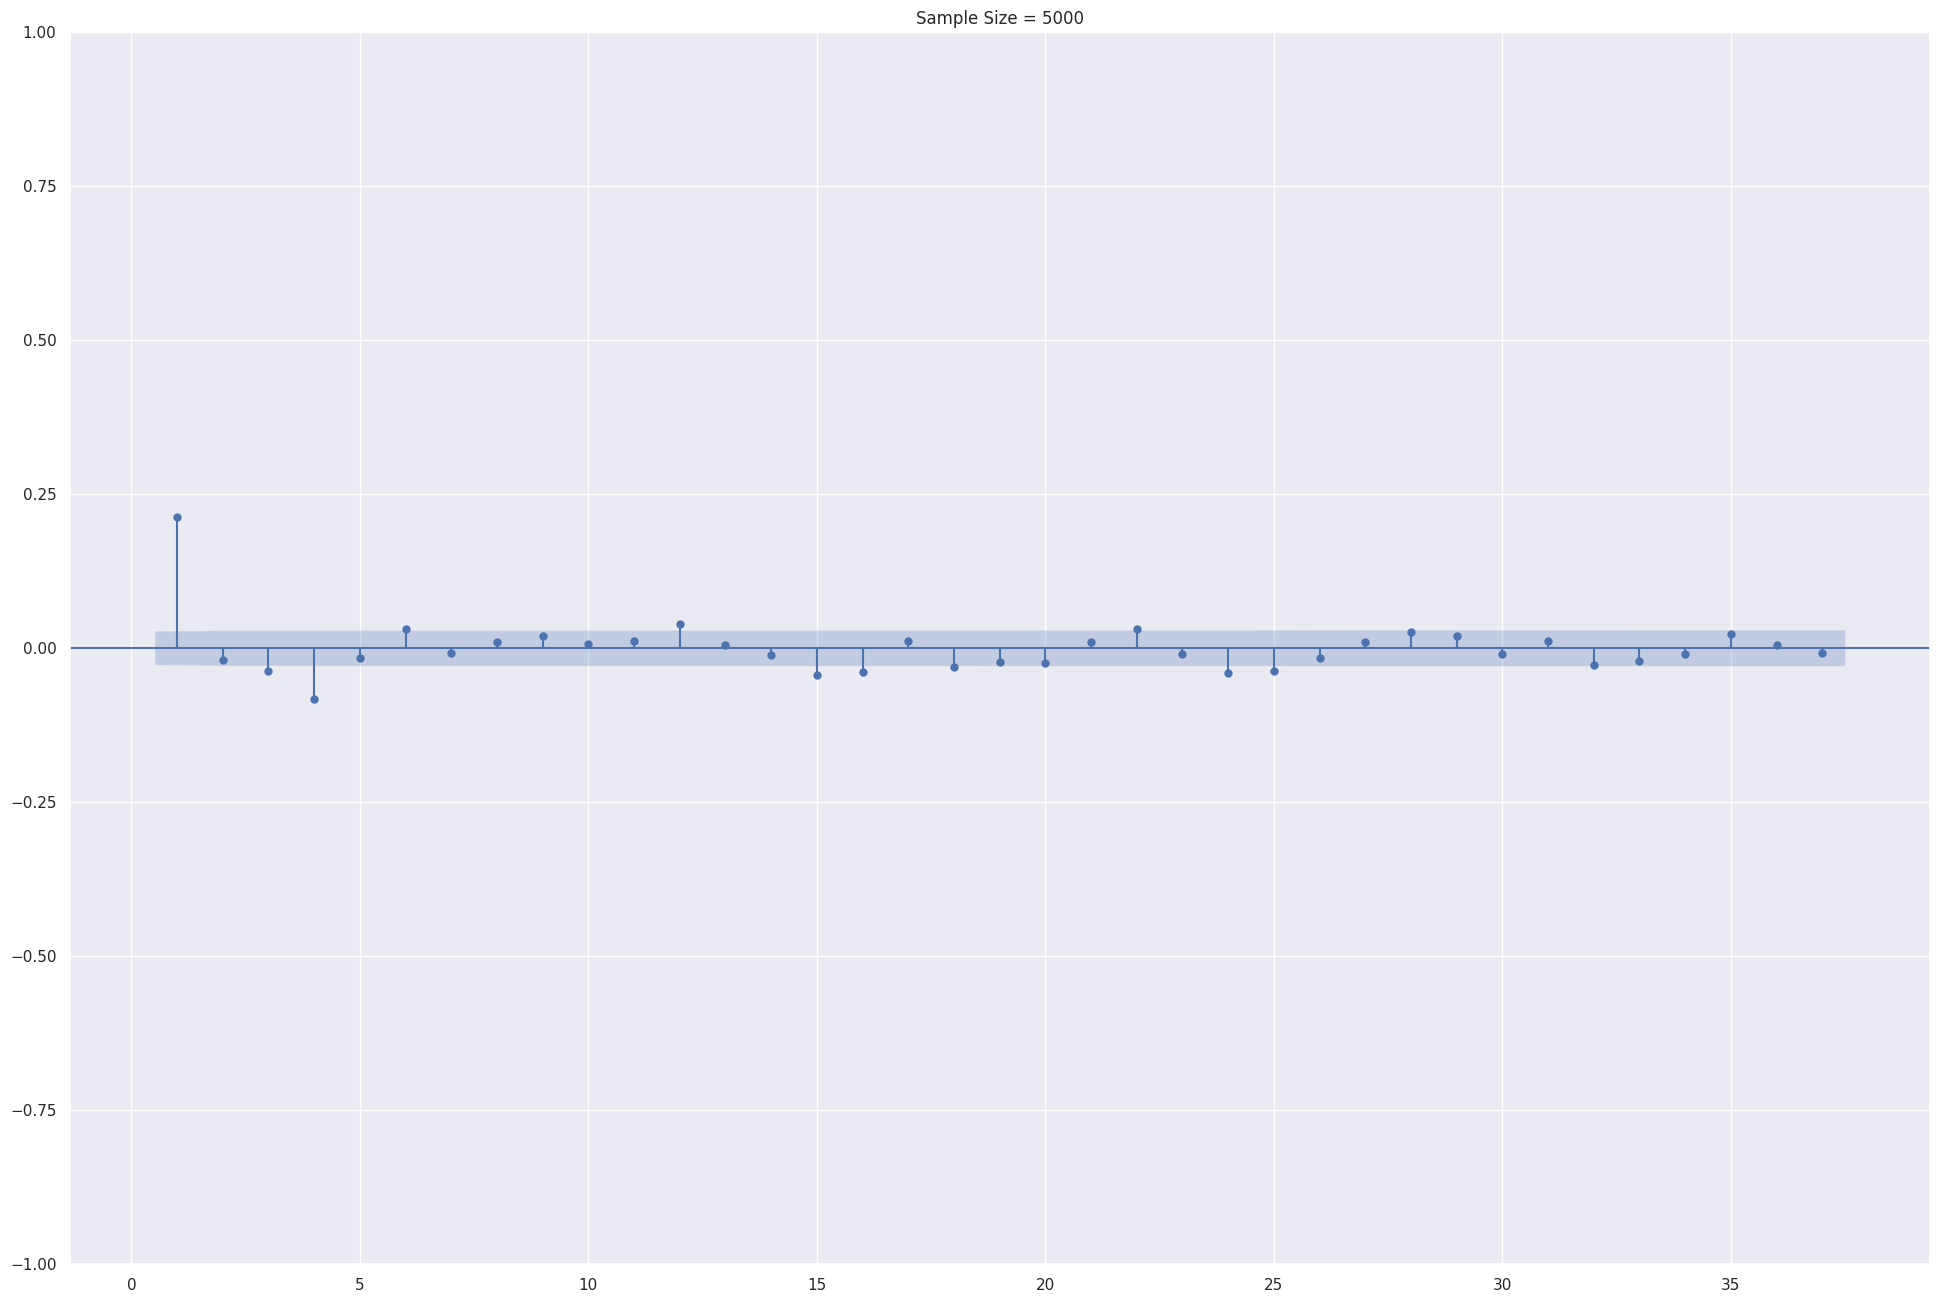

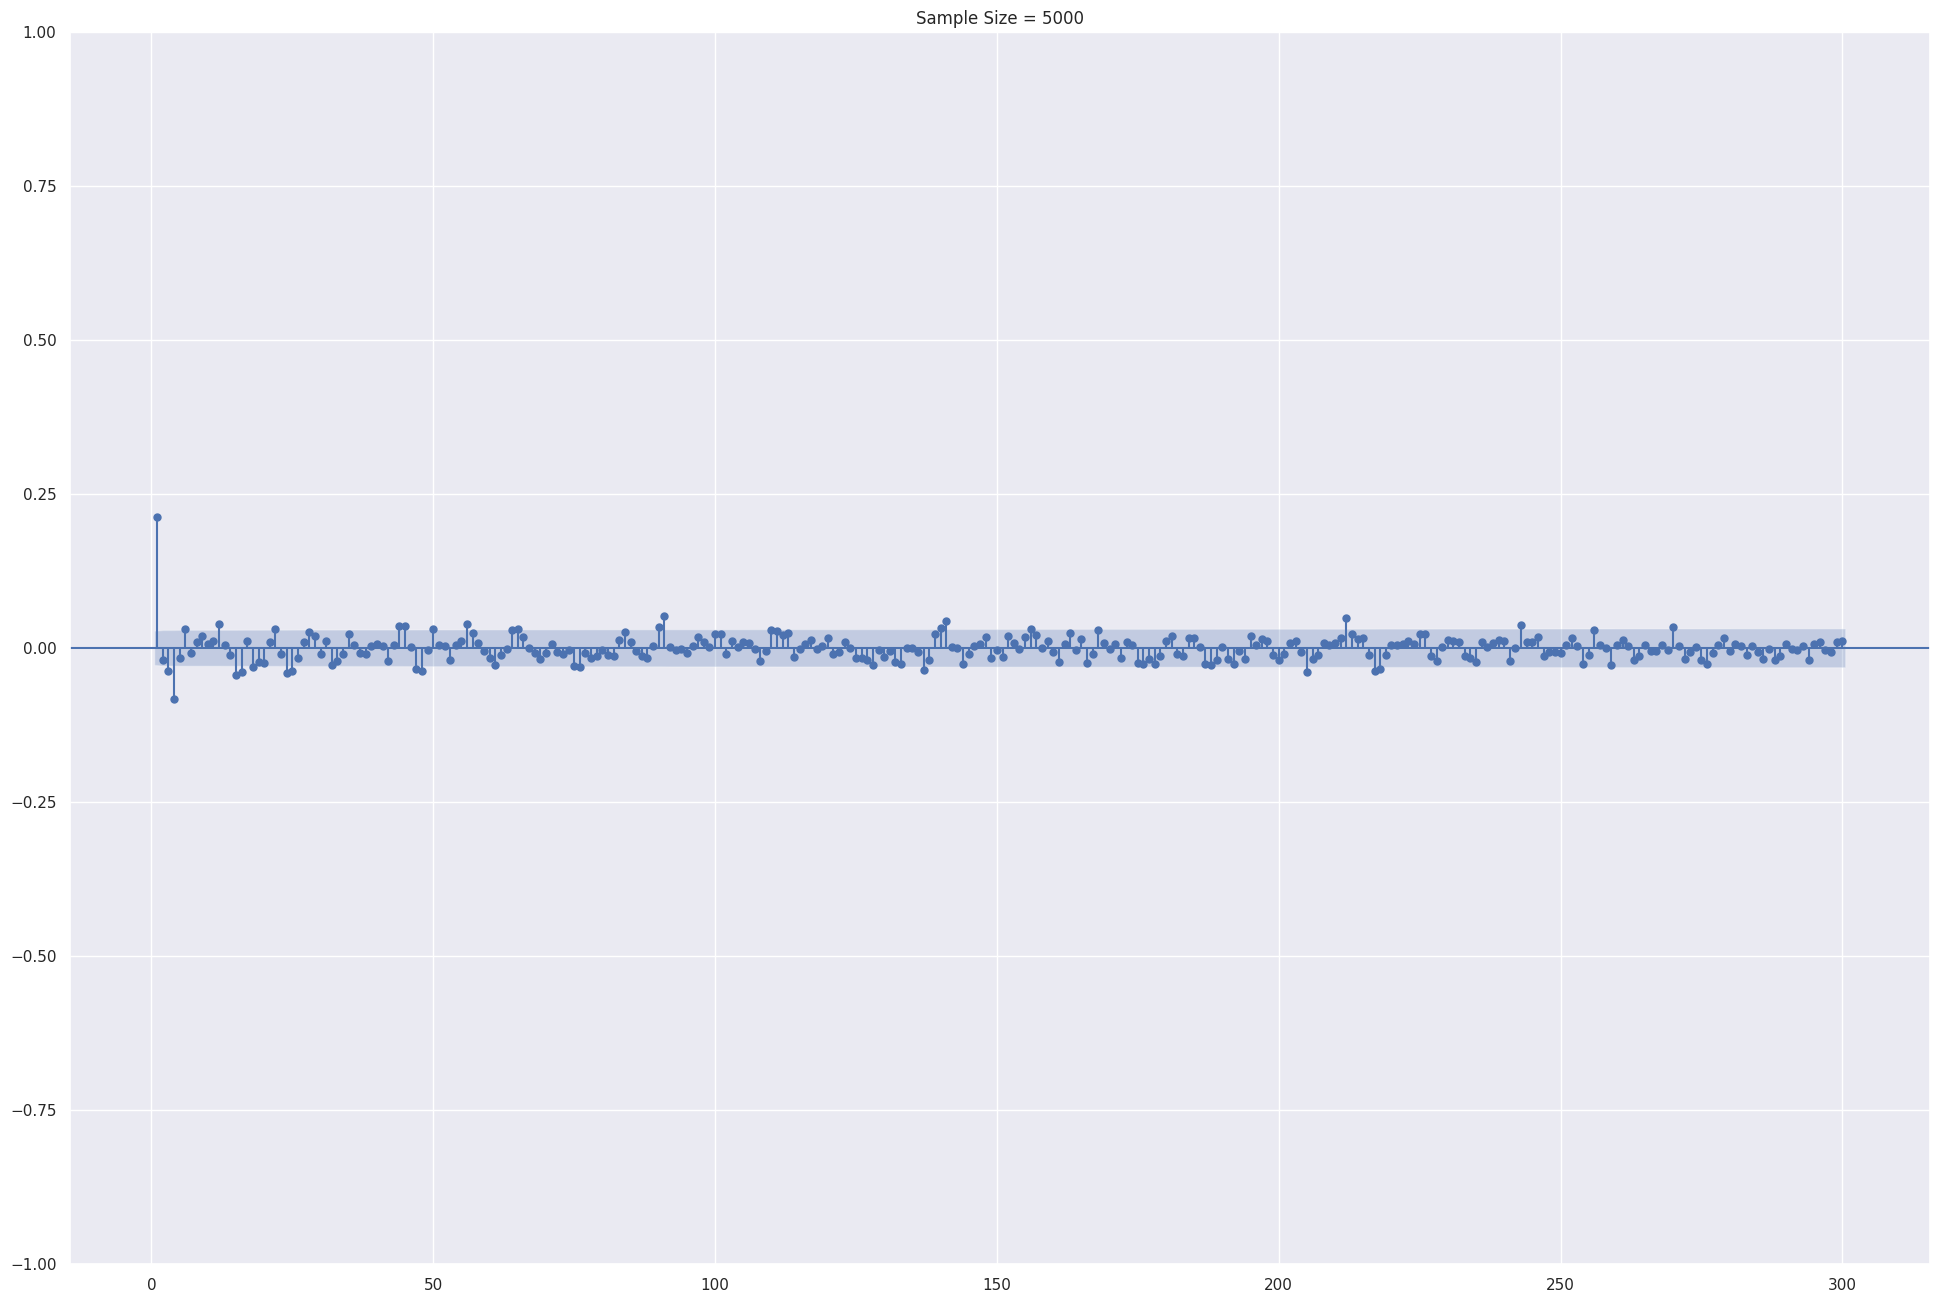

In [18]:
data_list=[200000, 100000, 50000, 5000]
for lengths in data_list: 
    plt.rc("figure", figsize=(24,16))
    sm.graphics.tsa.plot_acf(df['returns'].tail(lengths), title='Sample Size = '+str(lengths), alpha=0.05, zero=False);
    sm.graphics.tsa.plot_acf(df['returns'].tail(lengths), title='Sample Size = '+str(lengths), alpha=0.05, zero=False, lags=300);

The autocorrelations are difficult to analyze and to check for statistically significant correlations with such a large dataset. As shown above we can capture more by splitting the dataset. Furthermore, we show above how increasingly higher lag we have better chances of capturing more significant correlations. Therefore, we use 300 lags to capture the most from the data whilst also attempting to minimize computational strain.